In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import hvplot.polars
import seaborn as sns
import colorcet as cc
import holoviews as hv
from scipy.stats import gaussian_kde
import plotly.graph_objects as go
import plotly.figure_factory as ff
hv.extension('bokeh')
import sys, os

this_path = '/home/ibi/Documents/GitHub/diem-thpt-analysis'
sys.path.append(this_path)
os.chdir(this_path)

In [2]:
df = pl.read_csv('data/preprocessed/thpt_total.csv', schema_overrides={'VatLi': pl.Float64, 'HoaHoc': pl.Float64, 'SinhHoc': pl.Float64, 'KHTN': pl.Float64})

df

shape: (6_569_321, 14)
┌──────┬──────────┬───────────┬──────┬───┬───────┬────────┬──────┬──────────┐
│ Year ┆ CityCode ┆ StudentID ┆ Toan ┆ … ┆ DiaLi ┆ LichSu ┆ GDCD ┆ KHXH     │
│ ---  ┆ ---      ┆ ---       ┆ ---  ┆   ┆ ---   ┆ ---    ┆ ---  ┆ ---      │
│ i64  ┆ i64      ┆ i64       ┆ f64  ┆   ┆ f64   ┆ f64    ┆ f64  ┆ f64      │
╞══════╪══════════╪═══════════╪══════╪═══╪═══════╪════════╪══════╪══════════╡
│ 2018 ┆ 1        ┆ 1000033   ┆ 7.6  ┆ … ┆ 7.25  ┆ 4.25   ┆ 7.75 ┆ 6.42     │
│ 2018 ┆ 1        ┆ 1000034   ┆ 6.2  ┆ … ┆ 7.0   ┆ 5.25   ┆ 8.5  ┆ 6.92     │
│ 2018 ┆ 1        ┆ 1000035   ┆ 6.4  ┆ … ┆ 5.0   ┆ 3.75   ┆ 7.25 ┆ 5.33     │
│ 2018 ┆ 1        ┆ 1000037   ┆ 2.8  ┆ … ┆ 3.5   ┆ 3.5    ┆ 7.25 ┆ 4.75     │
│ 2018 ┆ 1        ┆ 1000038   ┆ 4.0  ┆ … ┆ 6.25  ┆ 3.25   ┆ 7.0  ┆ 5.5      │
│ …    ┆ …        ┆ …         ┆ …    ┆ … ┆ …     ┆ …      ┆ …    ┆ …        │
│ 2024 ┆ 64       ┆ 64006669  ┆ 3.2  ┆ … ┆ 6.25  ┆ 4.25   ┆ null ┆ 5.25     │
│ 2024 ┆ 64       ┆ 64006675  ┆ 8.2  ┆ … ┆ null  ┆ null   ┆ null ┆ null     │
│ 2024 ┆ 64       ┆ 64006673  ┆ 4.8  ┆ … ┆ 7.25  ┆ 6.5    ┆ null ┆ 6.875    │
│ 2024 ┆ 64       ┆ 64006674  ┆ 5.8  ┆ … ┆ null  ┆ null   ┆ null ┆ null     │
│ 2024 ┆ 64       ┆ 64006679  ┆ 6.0  ┆ … ┆ 6.0   ┆ 5.0    ┆ 7.5  ┆ 6.166667 │
└──────┴──────────┴───────────┴──────┴───┴───────┴────────┴──────┴──────────┘

In [3]:
df.describe()

shape: (9, 15)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ statistic ┆ Year      ┆ CityCode  ┆ StudentID ┆ … ┆ DiaLi     ┆ LichSu    ┆ GDCD      ┆ KHXH     │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---      │
│ str       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ count     ┆ 6.569321e ┆ 6.569321e ┆ 6.569321e ┆ … ┆ 4.290361e ┆ 4.338034e ┆ 3.698134e ┆ 4.036107 │
│           ┆ 6         ┆ 6         ┆ 6         ┆   ┆ 6         ┆ 6         ┆ 6         ┆ e6       │
│ null_coun ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 2.27896e6 ┆ 2.231287e ┆ 2.871187e ┆ 2.533214 │
│ t         ┆           ┆           ┆           ┆   ┆           ┆ 6         ┆ 6         ┆ e6       │
│ mean      ┆ 2021.1168 ┆ 27.672853 ┆ 2.7687e7  ┆ … ┆ 6.483913  ┆ 5.368889  ┆ 7.950359  ┆ 6.580889 │
│           ┆ 33        ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ std       ┆ 2.005821  ┆ 19.041114 ┆ 1.9032e7  ┆ … ┆ 1.32835   ┆ 1.804861  ┆ 1.217566  ┆ 1.269799 │
│ min       ┆ 2018.0    ┆ 1.0       ┆ 1.000001e ┆ … ┆ 0.25      ┆ 0.25      ┆ 0.25      ┆ 0.25     │
│           ┆           ┆           ┆ 6         ┆   ┆           ┆           ┆           ┆          │
│ 25%       ┆ 2019.0    ┆ 10.0      ┆ 1.0008526 ┆ … ┆ 5.5       ┆ 4.0       ┆ 7.25      ┆ 5.75     │
│           ┆           ┆           ┆ e7        ┆   ┆           ┆           ┆           ┆          │
│ 50%       ┆ 2021.0    ┆ 28.0      ┆ 2.8017763 ┆ … ┆ 6.5       ┆ 5.25      ┆ 8.25      ┆ 6.625    │
│           ┆           ┆           ┆ e7        ┆   ┆           ┆           ┆           ┆          │
│ 75%       ┆ 2023.0    ┆ 44.0      ┆ 4.4004068 ┆ … ┆ 7.5       ┆ 6.75      ┆ 8.75      ┆ 7.5      │
│           ┆           ┆           ┆ e7        ┆   ┆           ┆           ┆           ┆          │
│ max       ┆ 2024.0    ┆ 64.0      ┆ 6.400688e ┆ … ┆ 10.0      ┆ 10.0      ┆ 10.0      ┆ 10.0     │
│           ┆           ┆           ┆ 7         ┆   ┆           ┆           ┆           ┆          │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

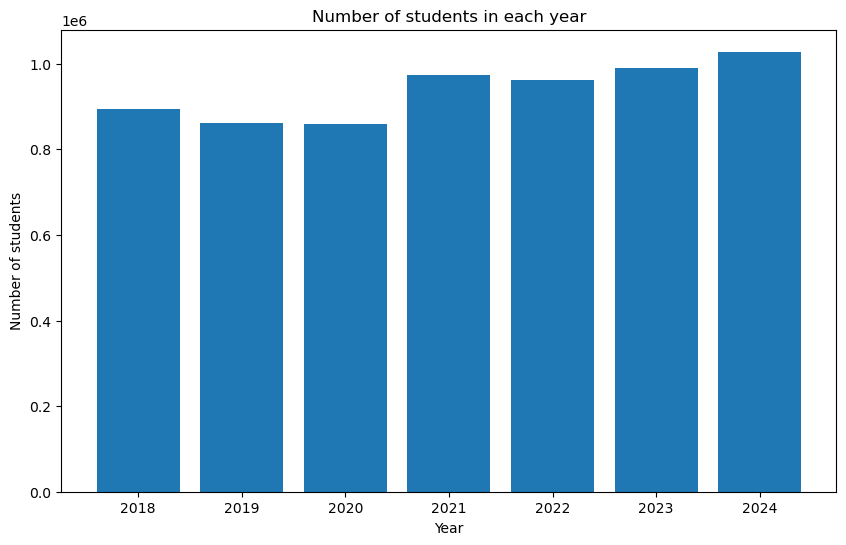

In [4]:
years = {}
for year in df['Year'].unique().to_numpy():
    years[year] = df.filter(df['Year'] == year).height

plt.figure(figsize=(10, 6))
plt.bar(years.keys(), [count for count in years.values()])
plt.xlabel('Year')
plt.ylabel('Number of students')
plt.title('Number of students in each year')
plt.show()

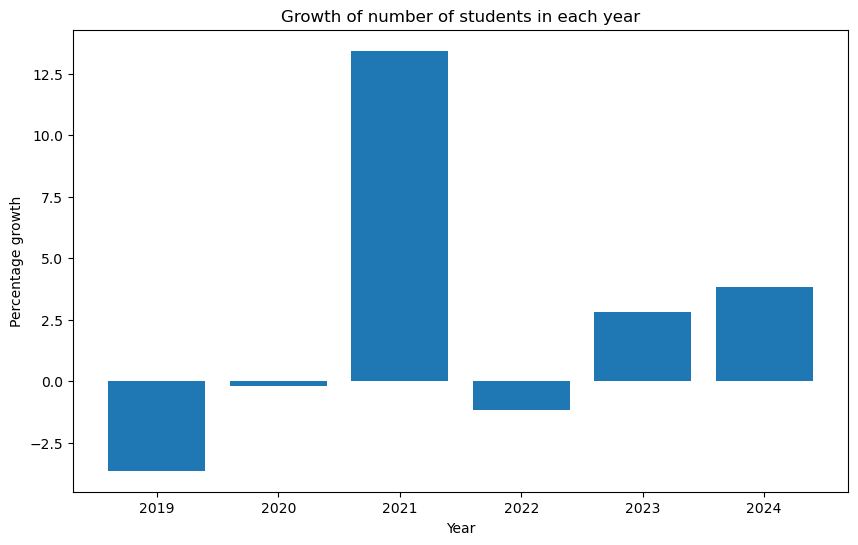

In [5]:
years = dict(sorted(years.items()))
growth = {}
for year in years:
    if year == 2018:
        growth[year] = 0
    else:
        growth[year] = (years[year] - years[year - 1]) / years[year - 1] * 100

growth.pop(2018, None)

plt.figure(figsize=(10, 6))
plt.bar(growth.keys(), [count for count in growth.values()])
plt.xlabel('Year')
plt.ylabel('Percentage growth')
plt.title('Growth of number of students in each year')
plt.show()

In [6]:
subjects = ['Toan', 'NguVan', 'NgoaiNgu', 'VatLi', 'HoaHoc', 'SinhHoc', 'LichSu', 'DiaLi', 'GDCD', 'KHTN', 'KHXH']

In [7]:
mean_score_df = df.select('Year', 'Toan', 'NguVan', 'NgoaiNgu', 'VatLi', 'HoaHoc', 'SinhHoc', 'LichSu', 'DiaLi', 'GDCD') \
    .group_by('Year') \
    .agg(*[pl.mean(col) for col in ['Toan', 'NguVan', 'NgoaiNgu', 'VatLi', 'HoaHoc', 'SinhHoc', 'LichSu', 'DiaLi', 'GDCD']])

mean_score_df = mean_score_df.sort('Year')

In [8]:
subject_names = {
    'Toan': 'Toán',
    'NguVan': 'Văn',
    'NgoaiNgu': 'Anh',
    'VatLi': 'Lí',
    'HoaHoc': 'Hóa',
    'SinhHoc': 'Sinh',
    'LichSu': 'Sử',
    'DiaLi': 'Địa',
    'GDCD': 'GDCD',
    'KHTN': 'KHTN',
    'KHXH': 'KHXH'
}

In [9]:
subject_colors = {
    'Toan': 'darkgreen',     
    'NguVan': 'coral',        
    'NgoaiNgu': 'royalblue',  
    'VatLi': 'rebeccapurple',   
    'HoaHoc': 'hotpink',      
    'SinhHoc': 'seagreen',    
    'LichSu': 'peru',   
    'DiaLi': 'mediumslateblue',      
    'GDCD': 'gold',
    'KHTN': 'forestgreen',
    'KHXH': 'tomato'
}

In [10]:
renamed_mean_score_df = mean_score_df.rename(subject_names)
renamed_mean_score_df.hvplot.line(
    x='Year',
    y=[subject_names[subject] for subject in subject_names if subject not in ['KHTN', 'KHXH']],
    ylabel='Mean score',
    xlabel='Year',
    title='Mean score of each subject in each year',
    width=750,
    height=500,
    color=[subject_colors[subject] for subject in subject_names if subject not in ['KHTN', 'KHXH']]
)

:NdOverlay   [Variable]
   :Curve   [Year]   (value)

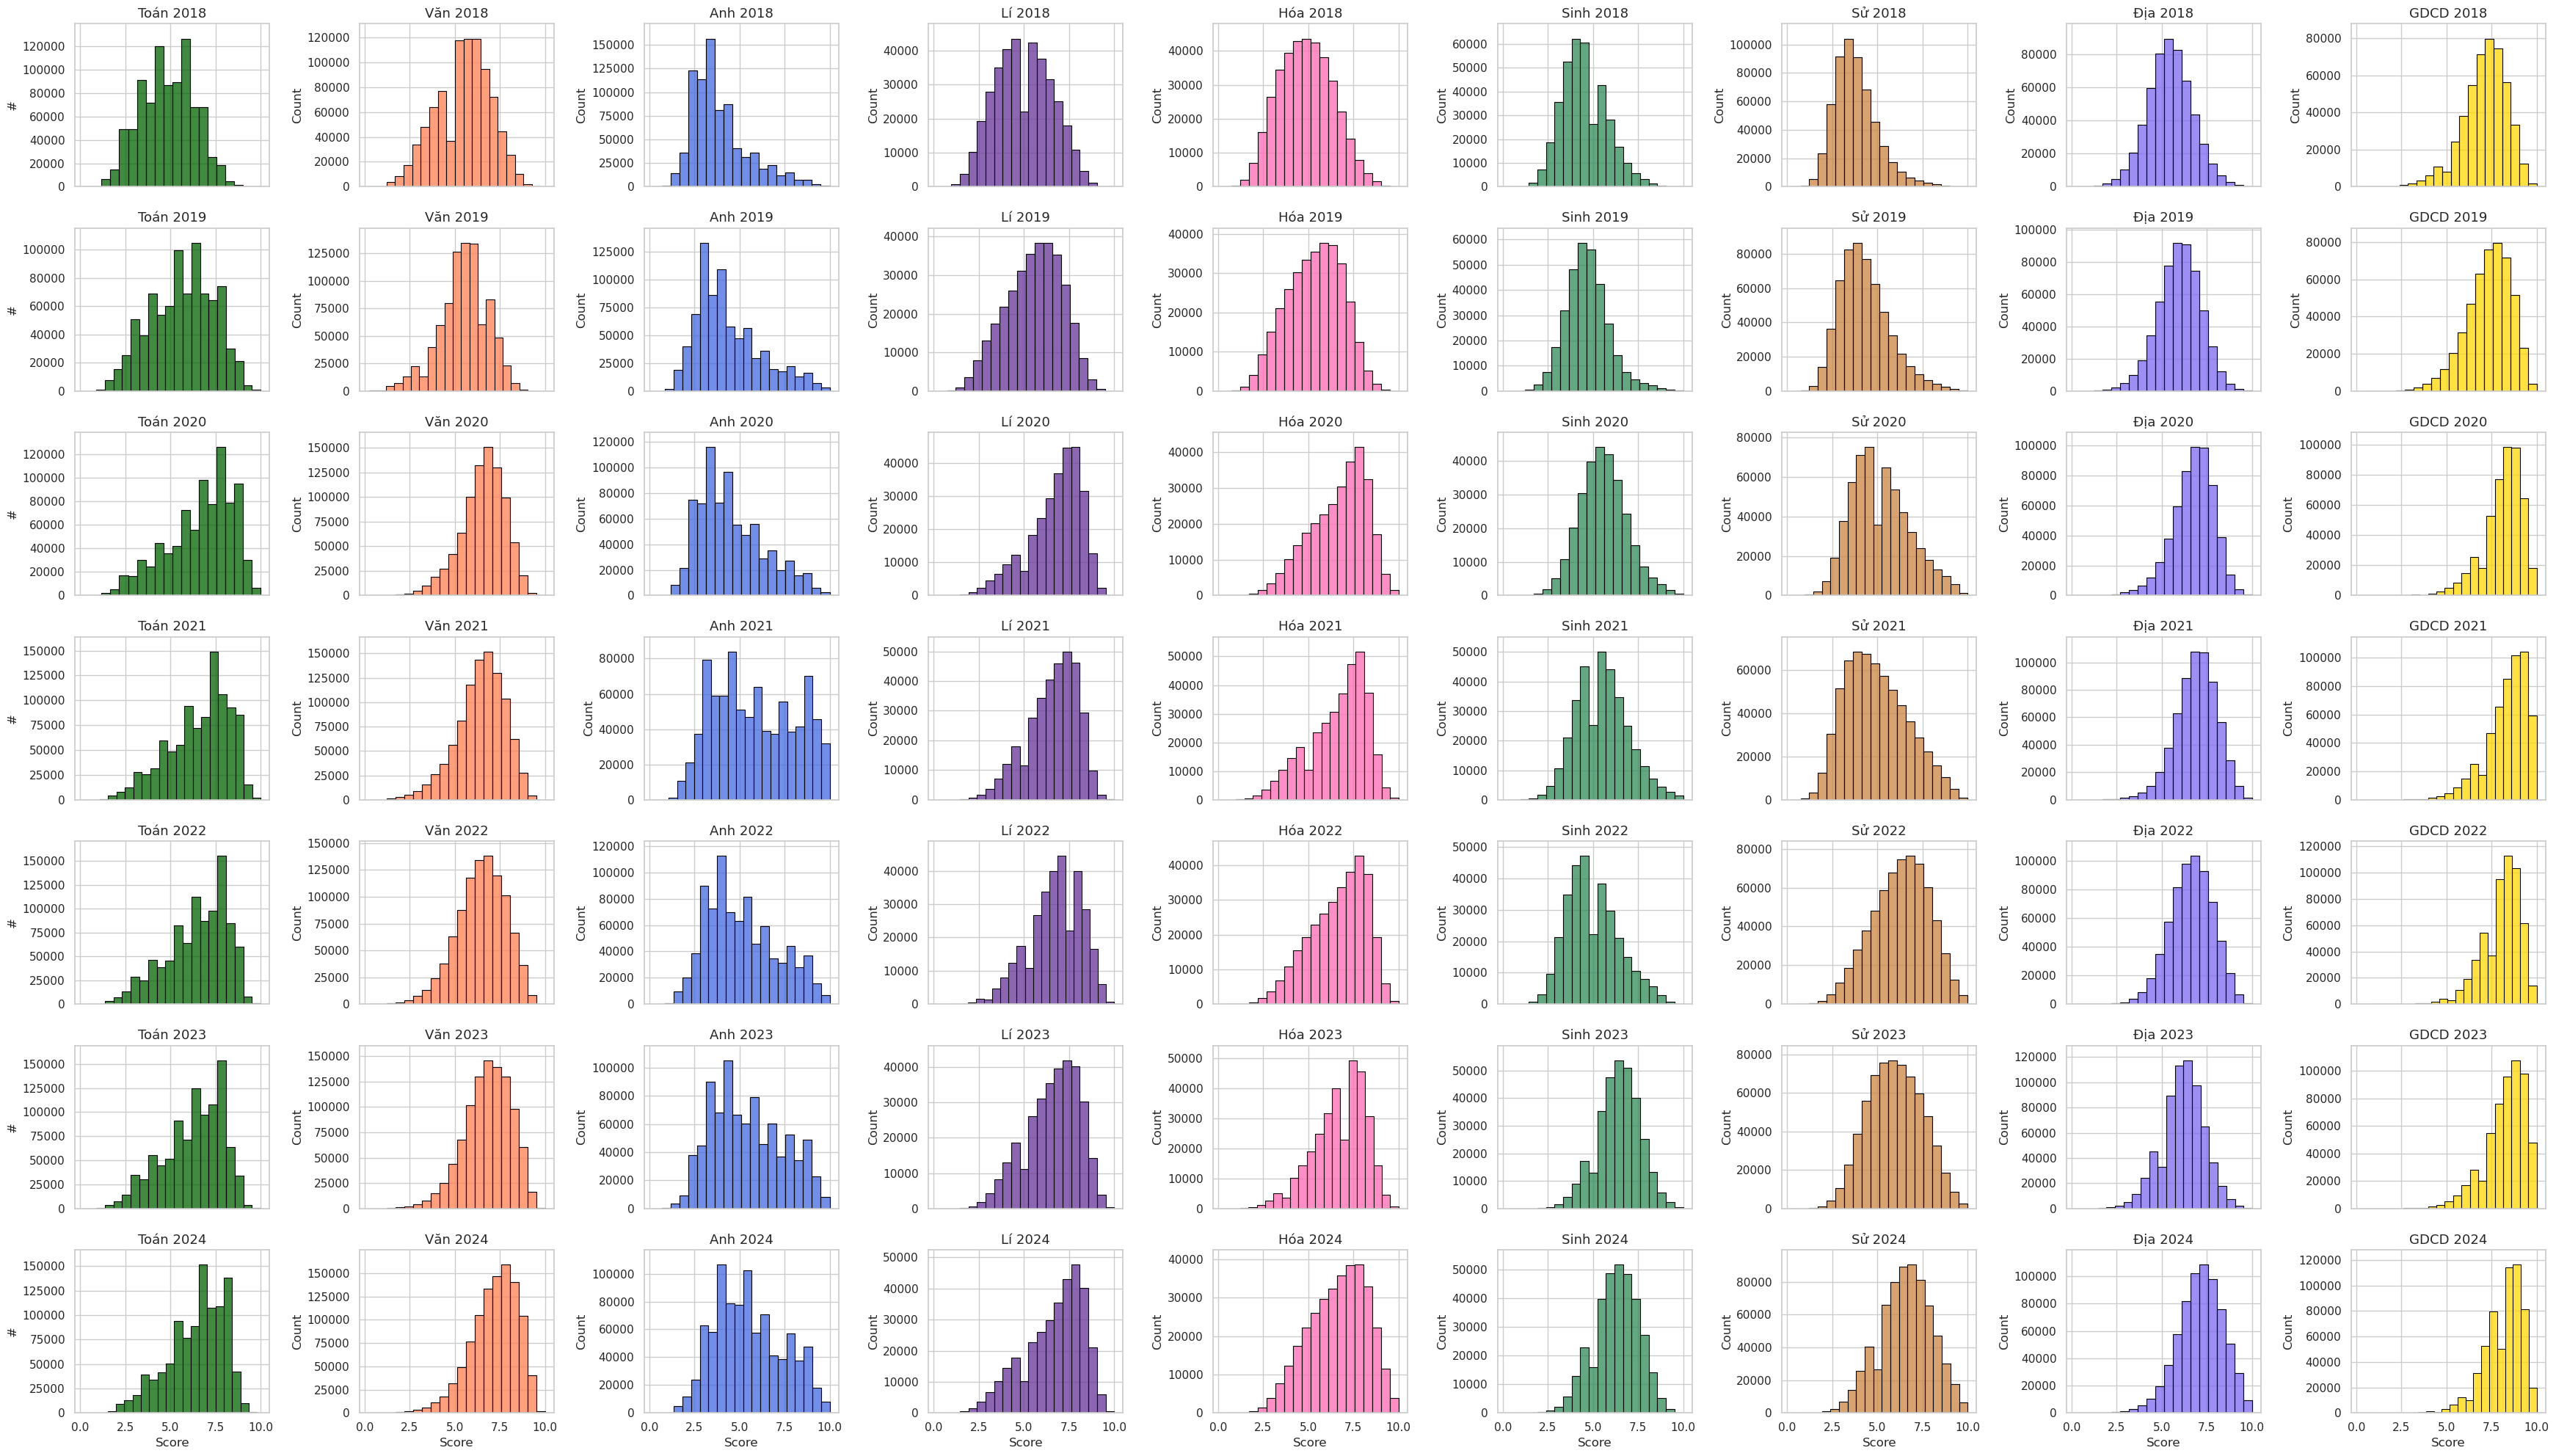

In [11]:
sns.set_theme(style="whitegrid")

filtered_subjects = [subject for subject in subjects if subject not in ['KHTN', 'KHXH']]

years = df.select('Year').unique().sort('Year').to_series()

fig, axes = plt.subplots(len(years), len(filtered_subjects), figsize=(35, 20), sharex=True)

for i, year in enumerate(years):
    for j, subject in enumerate(filtered_subjects):
        data = df.filter(pl.col('Year') == year).select(subject).drop_nulls().to_series()
        
        hist, bins = np.histogram(data, bins=20)
        y_limit = hist.max() * 1.1
        
        sns.histplot(data, color=subject_colors[subject], edgecolor='black', bins=20, ax=axes[i, j], legend=False)
        axes[i, j].set_ylim(0, y_limit)
        
        if i == 0:
            axes[i, j].set_title(subject_names[subject], fontsize=13)
        if j == 0:
            axes[i, j].set_ylabel('#')
        if i == len(years) - 1:
            axes[i, j].set_xlabel('Score')
        
        axes[i, j].set_title(f'{subject_names[subject]} {year}', fontsize=13)
        
plt.tight_layout(h_pad=1.5, w_pad=1.5)
plt.show()

In [12]:
def plot_subject_histograms(subject):
    unique_years = df.select(pl.col('Year')).unique().sort('Year').to_series()
    num_years = len(unique_years)

    fig, axes = plt.subplots(num_years, 2, figsize=(14, 3 * num_years), gridspec_kw={'width_ratios': [6.5, 1], 'wspace': 0.1}, sharey=False)

    for i, year in enumerate(sorted(unique_years)):
        year_data = df.filter(pl.col('Year') == year).select(subject).drop_nulls()

        mean_score = year_data.select(pl.mean(subject)).item()
        median_score = year_data.select(pl.median(subject)).item()
        mode_scores = year_data.select(pl.col(subject).mode())
        mode_score = mode_scores.item() if mode_scores.shape[0] == 1 else mode_scores[0, 0]
        percentile_99 = year_data.select(pl.col(subject).quantile(0.99)).item()
        percentile_97 = year_data.select(pl.col(subject).quantile(0.97)).item()
        percentile_95 = year_data.select(pl.col(subject).quantile(0.95)).item()
        percentile_90 = year_data.select(pl.col(subject).quantile(0.90)).item()
        percentile_80 = year_data.select(pl.col(subject).quantile(0.80)).item()
        percentile_70 = year_data.select(pl.col(subject).quantile(0.70)).item()

        sns.histplot(year_data.to_series().to_list(), color=subject_colors[subject], ax=axes[i, 0], bins=20, stat='count', edgecolor='black', linewidth=1)

        axes[i, 0].set_title(f'{subject_names[subject]} {year}')
        axes[i, 0].set_xlabel('Scores', fontsize=11)
        axes[i, 0].set_ylabel('Count', fontsize=11)

        legend_text = (
            f'Mean: {mean_score:.2f}\n'
            f'Median: {median_score:.2f}\n'
            f'Mode: {mode_score:.2f}\n'
            f'Top 1%: {percentile_99:.2f}\n'
            f'Top 3%: {percentile_97:.2f}\n'
            f'Top 5%: {percentile_95:.2f}\n'
            f'Top 10%: {percentile_90:.2f}\n'
            f'Top 20%: {percentile_80:.2f}\n'
            f'Top 30%: {percentile_70:.2f}'
        )
        
        axes[i, 1].text(0, 0.5, legend_text, 
                        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'),
                        fontsize=11, ha='left', va='center', wrap=True)
        axes[i, 1].axis('off')

    plt.subplots_adjust(hspace=0.7)
    plt.show()

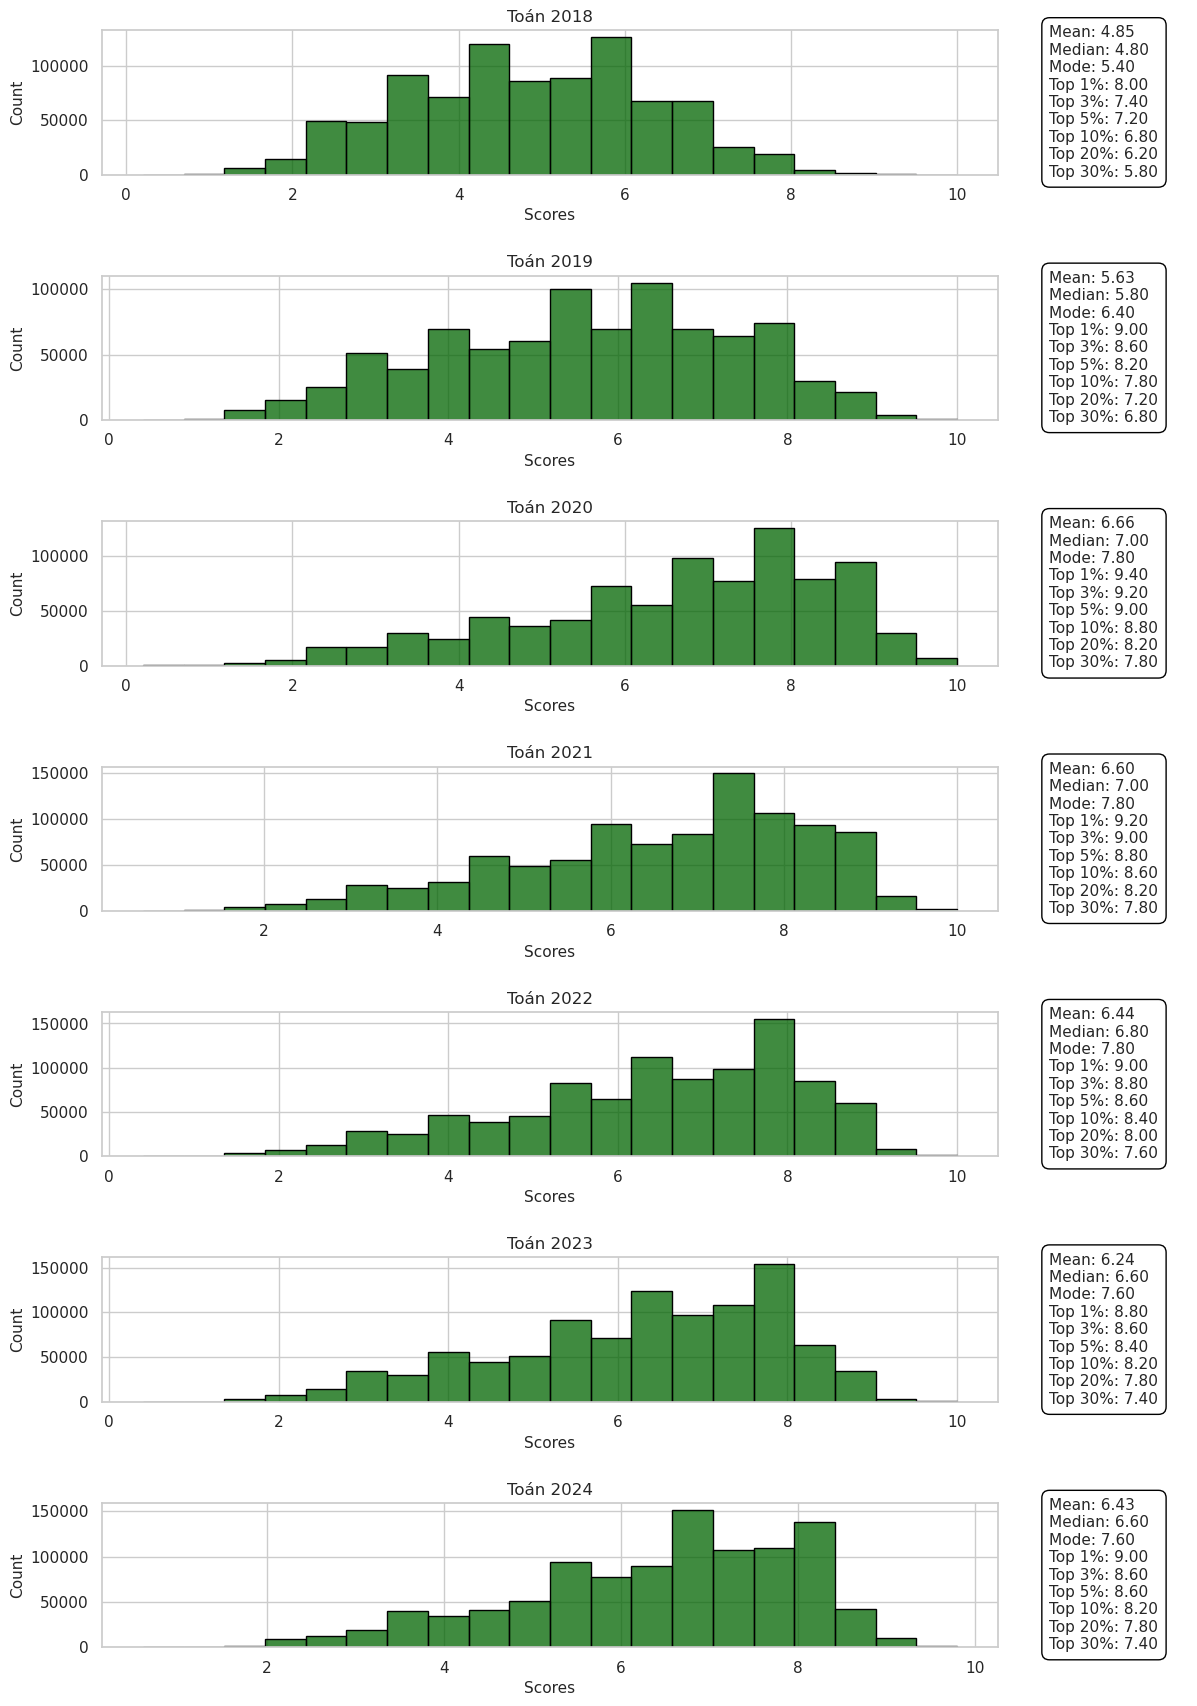

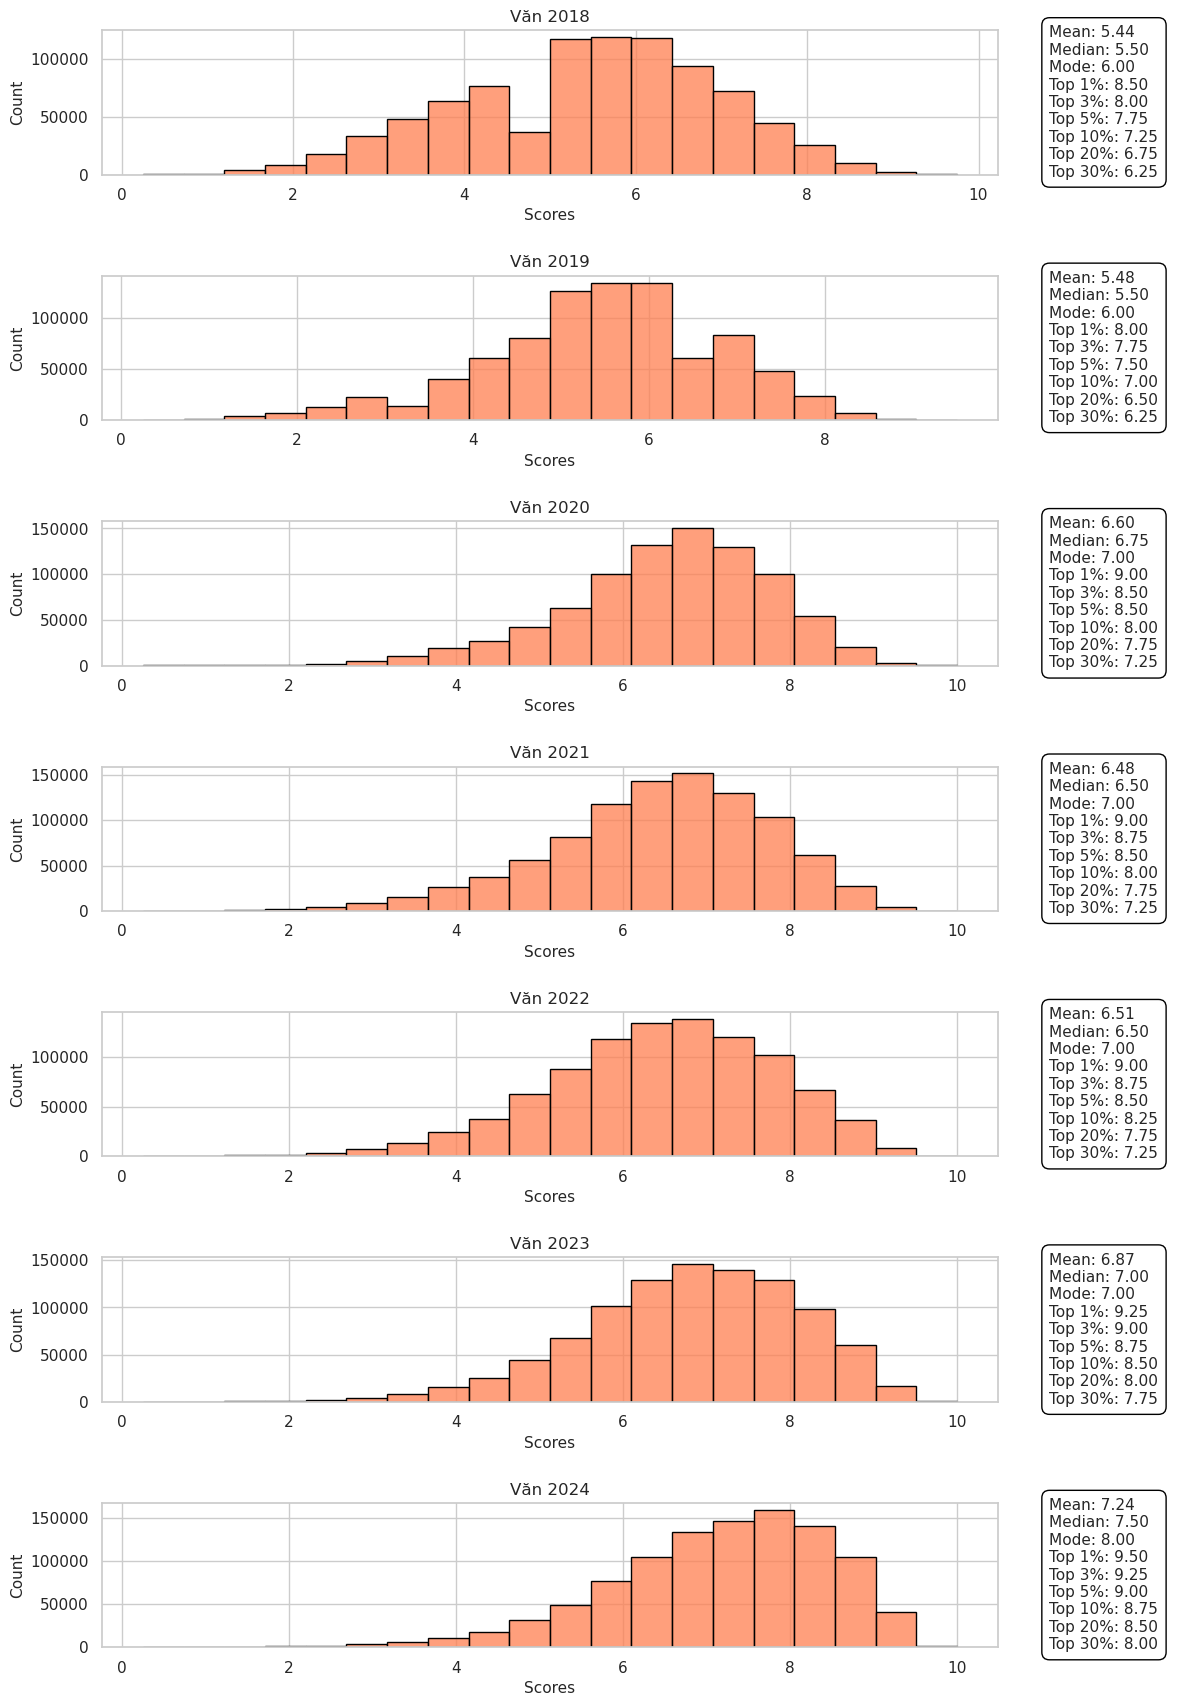

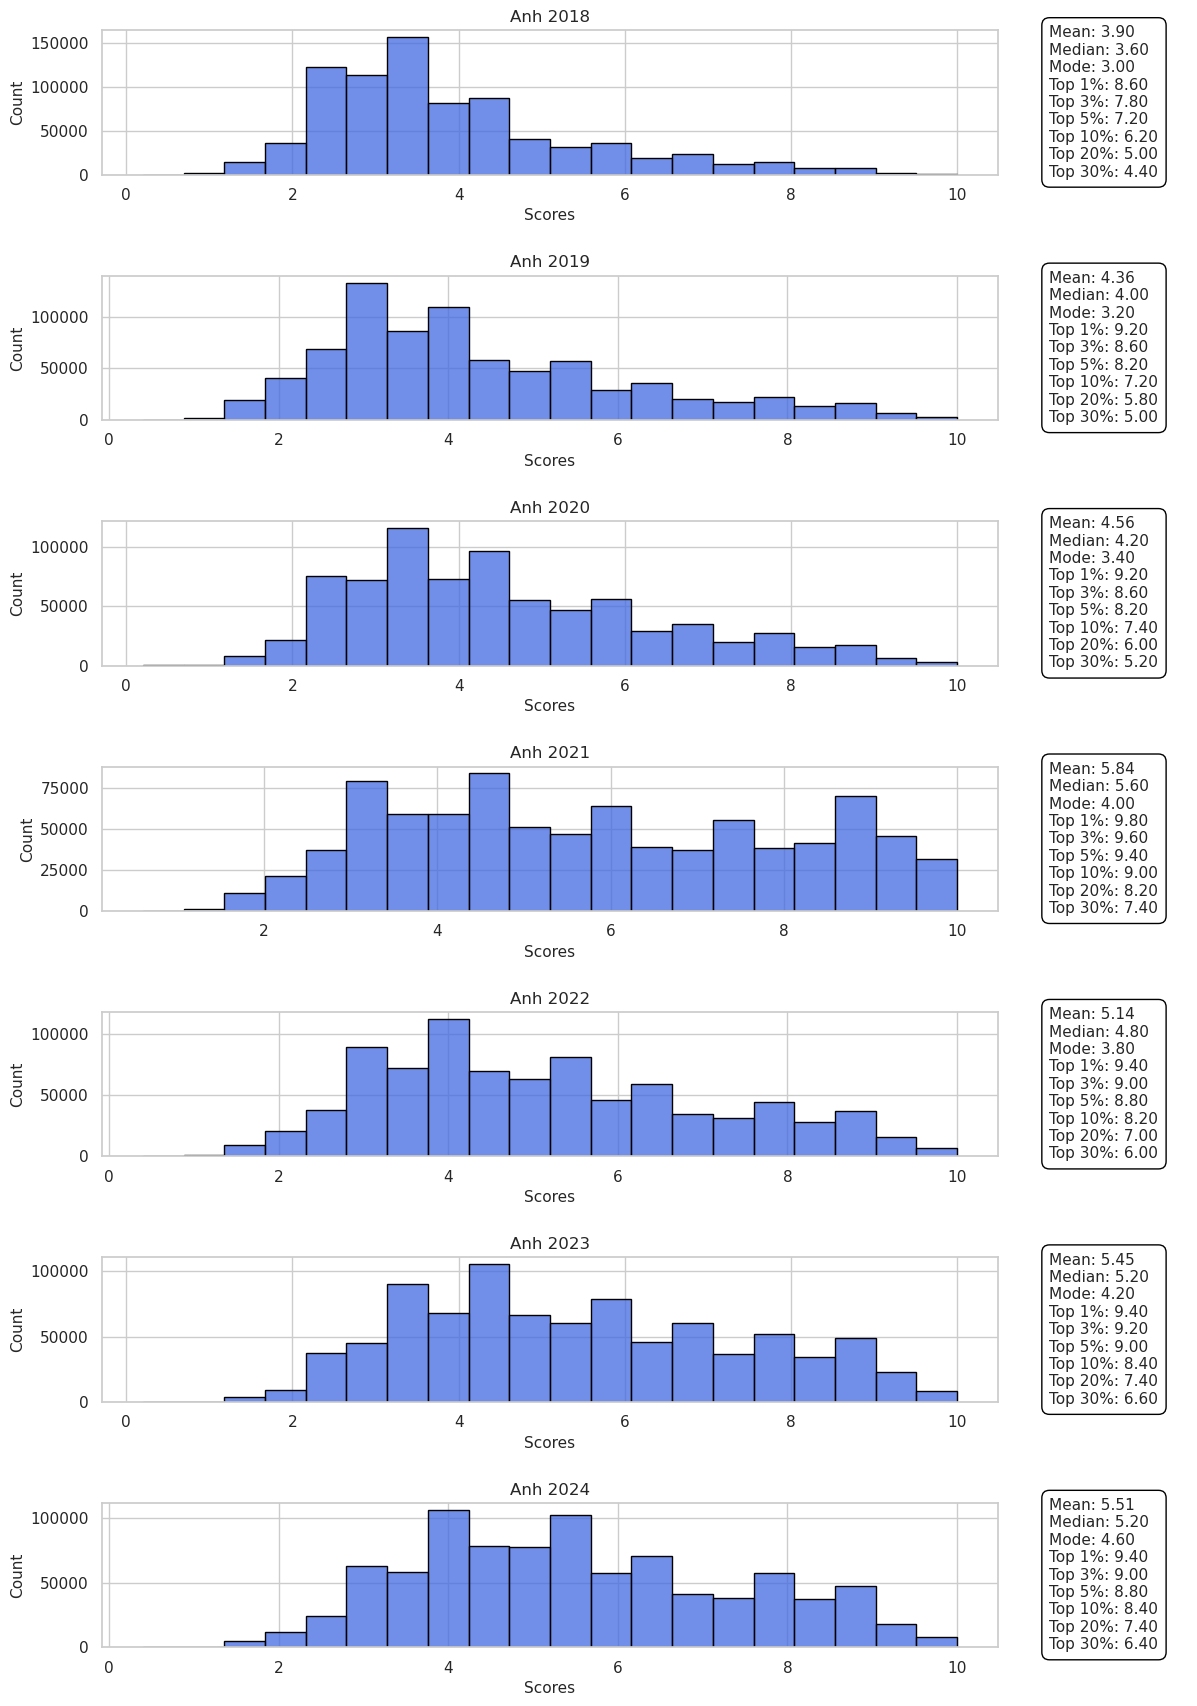

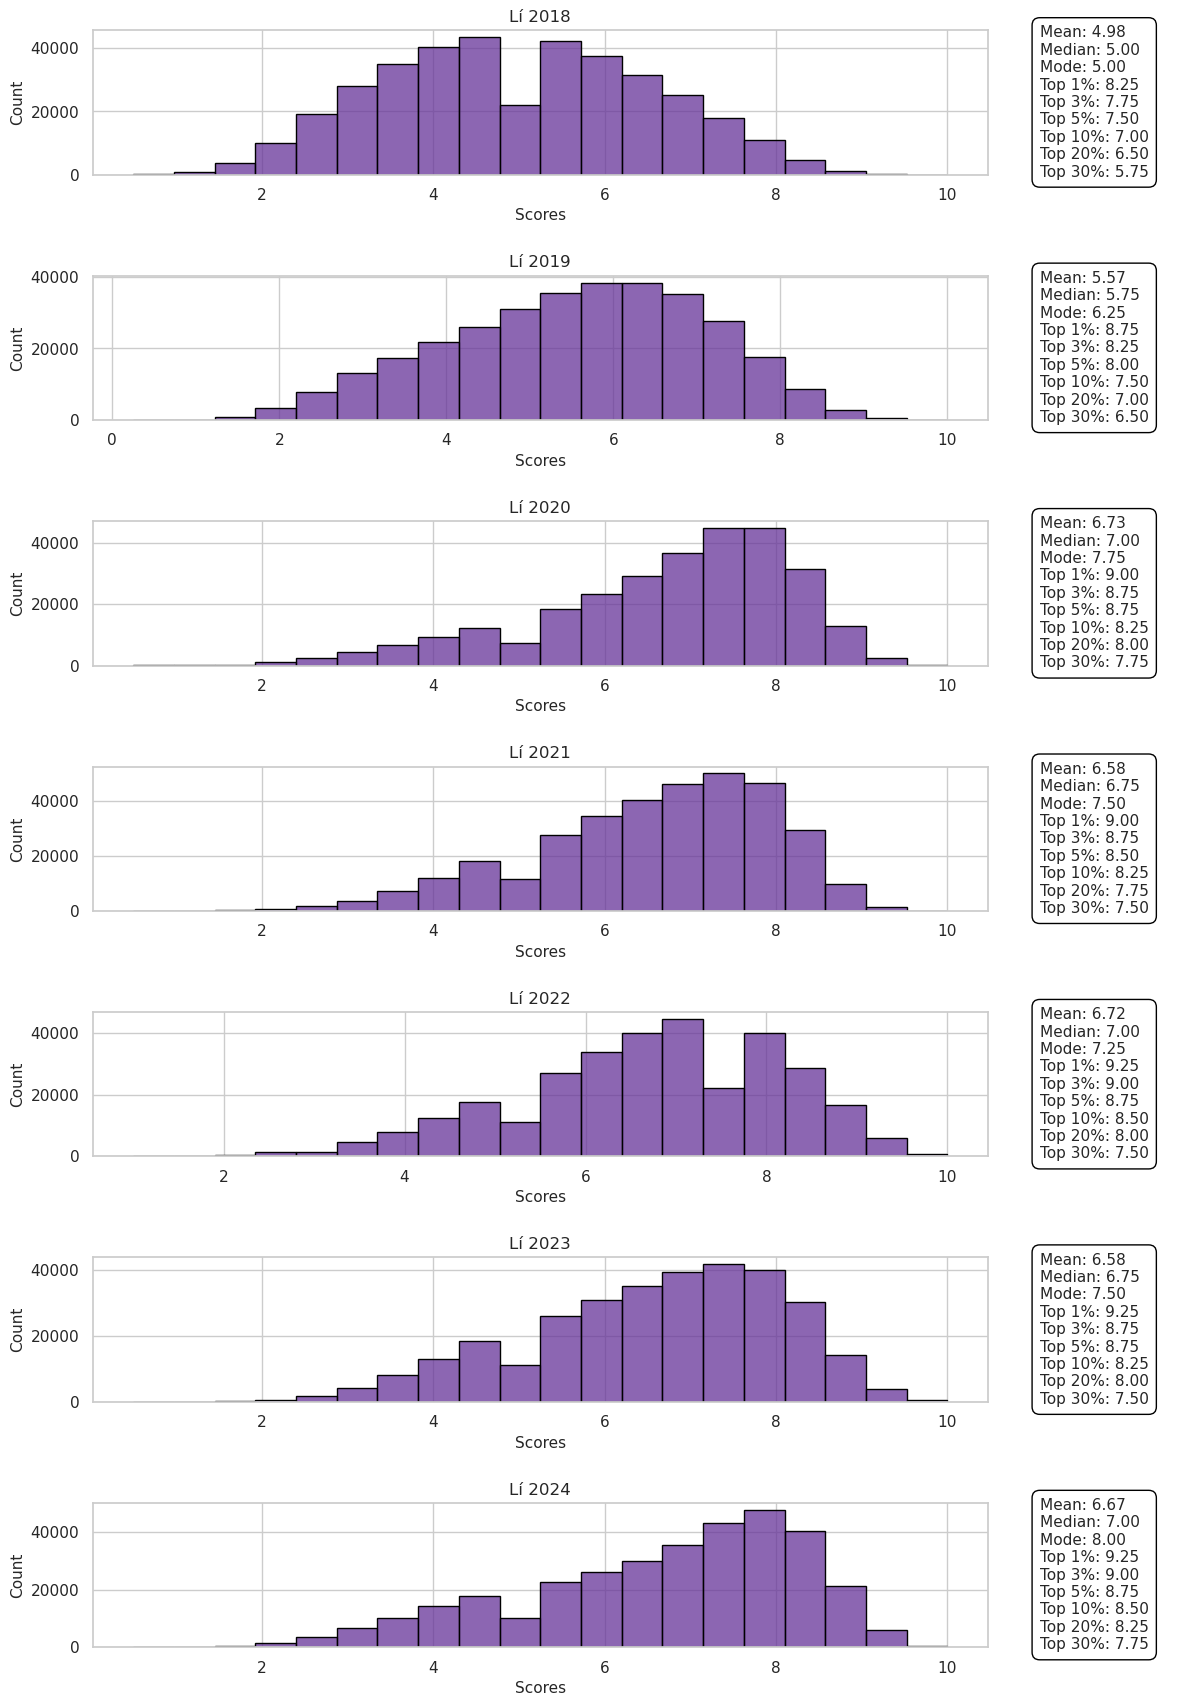

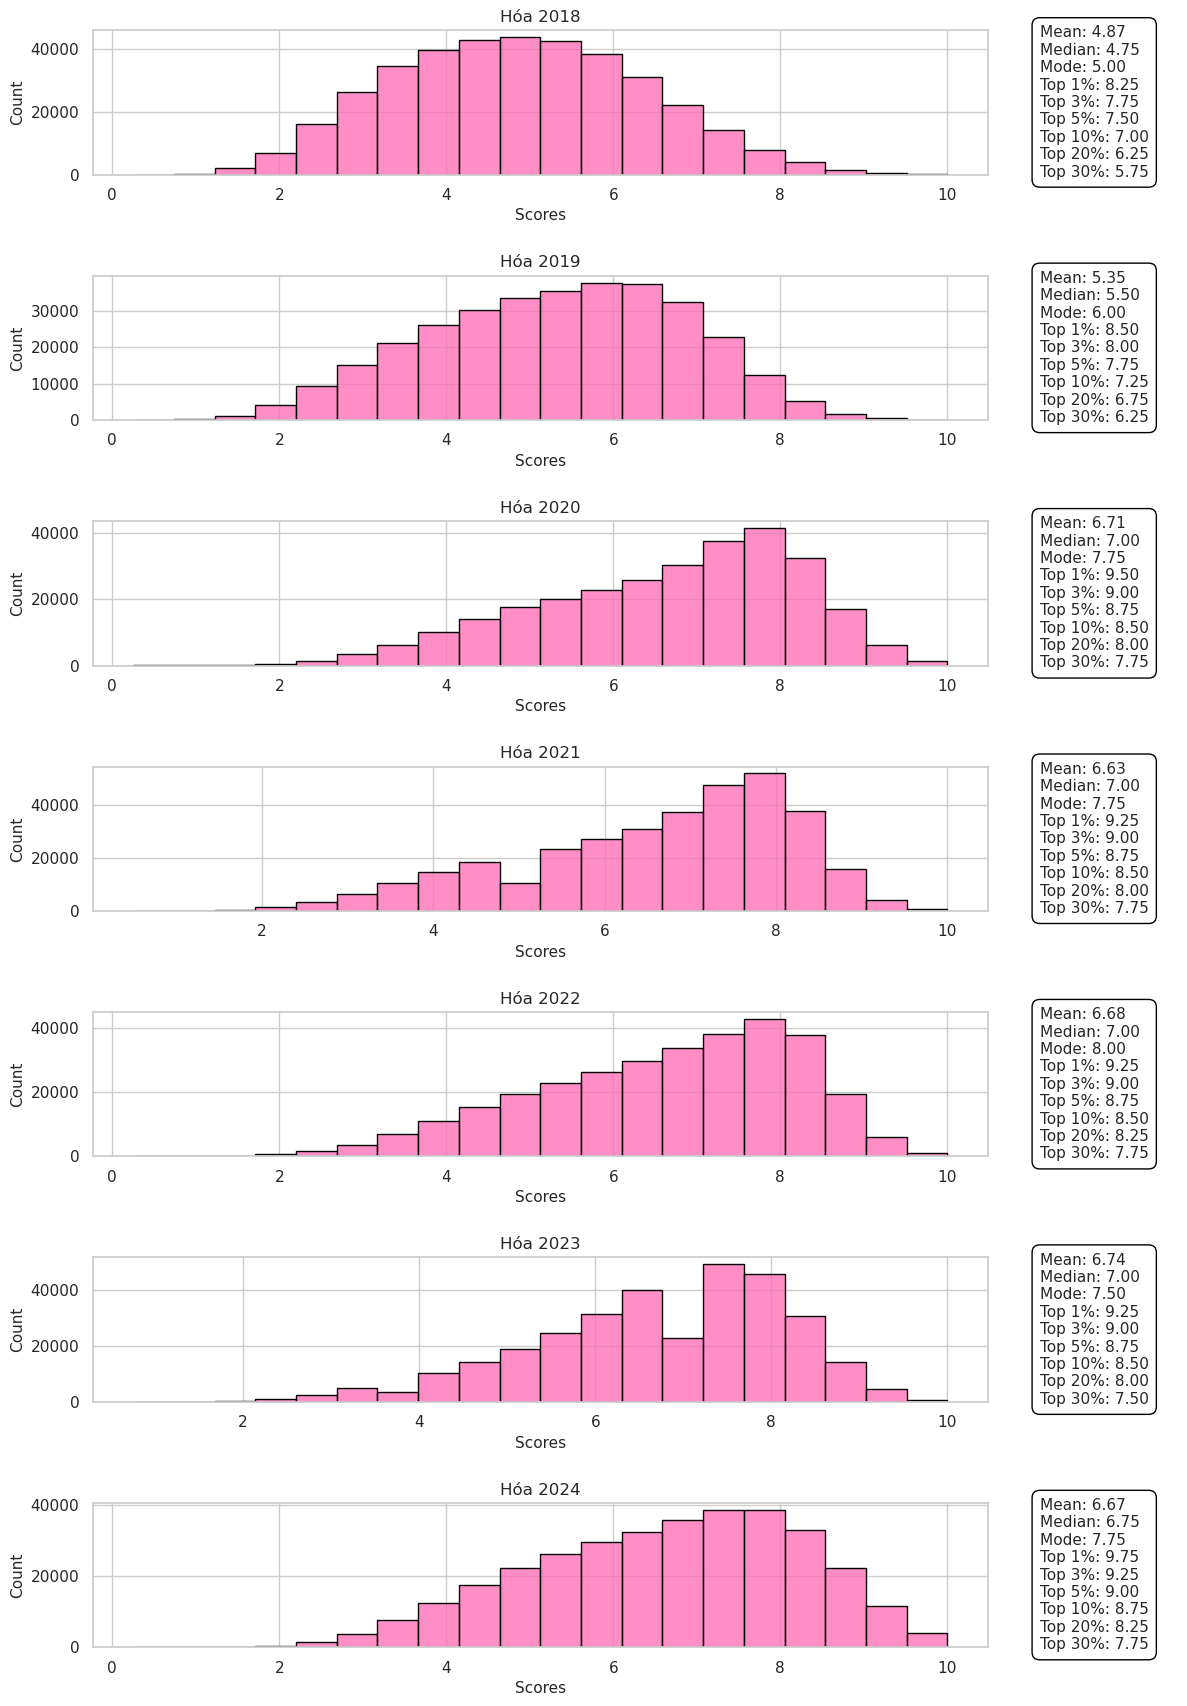

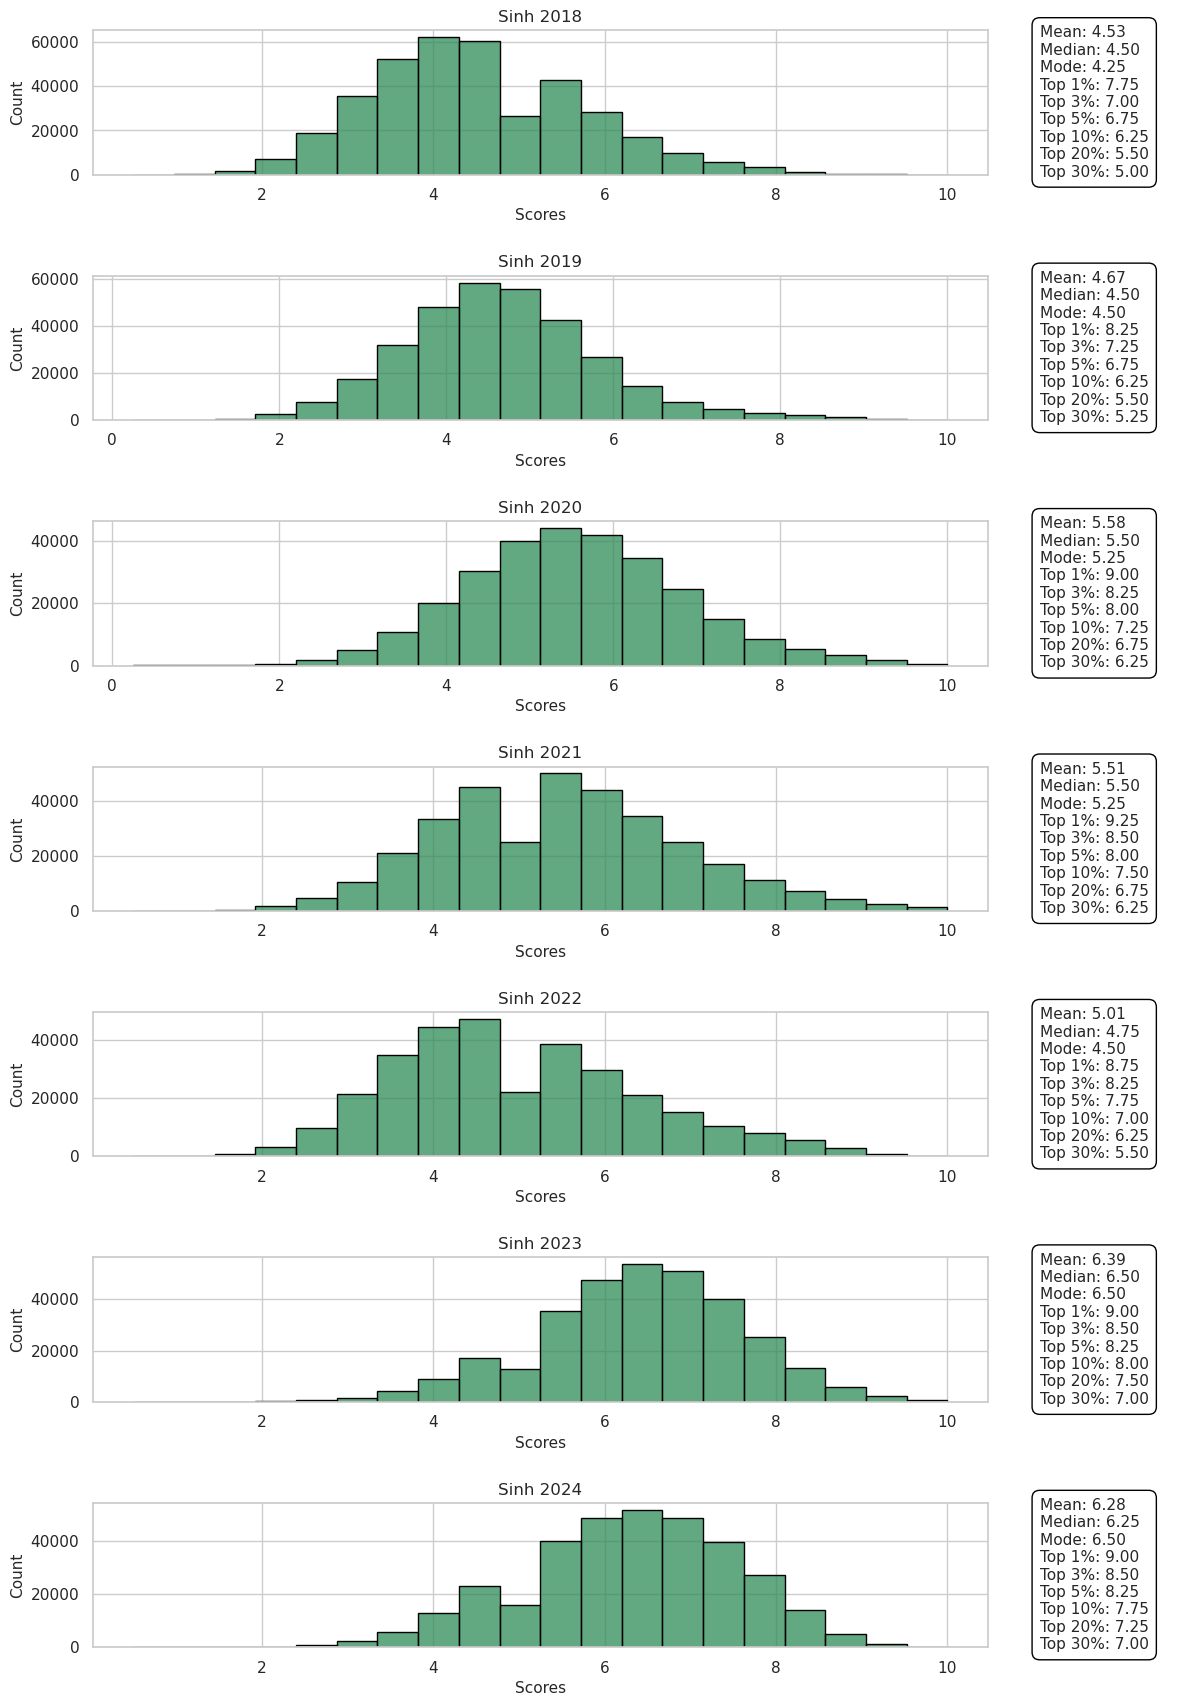

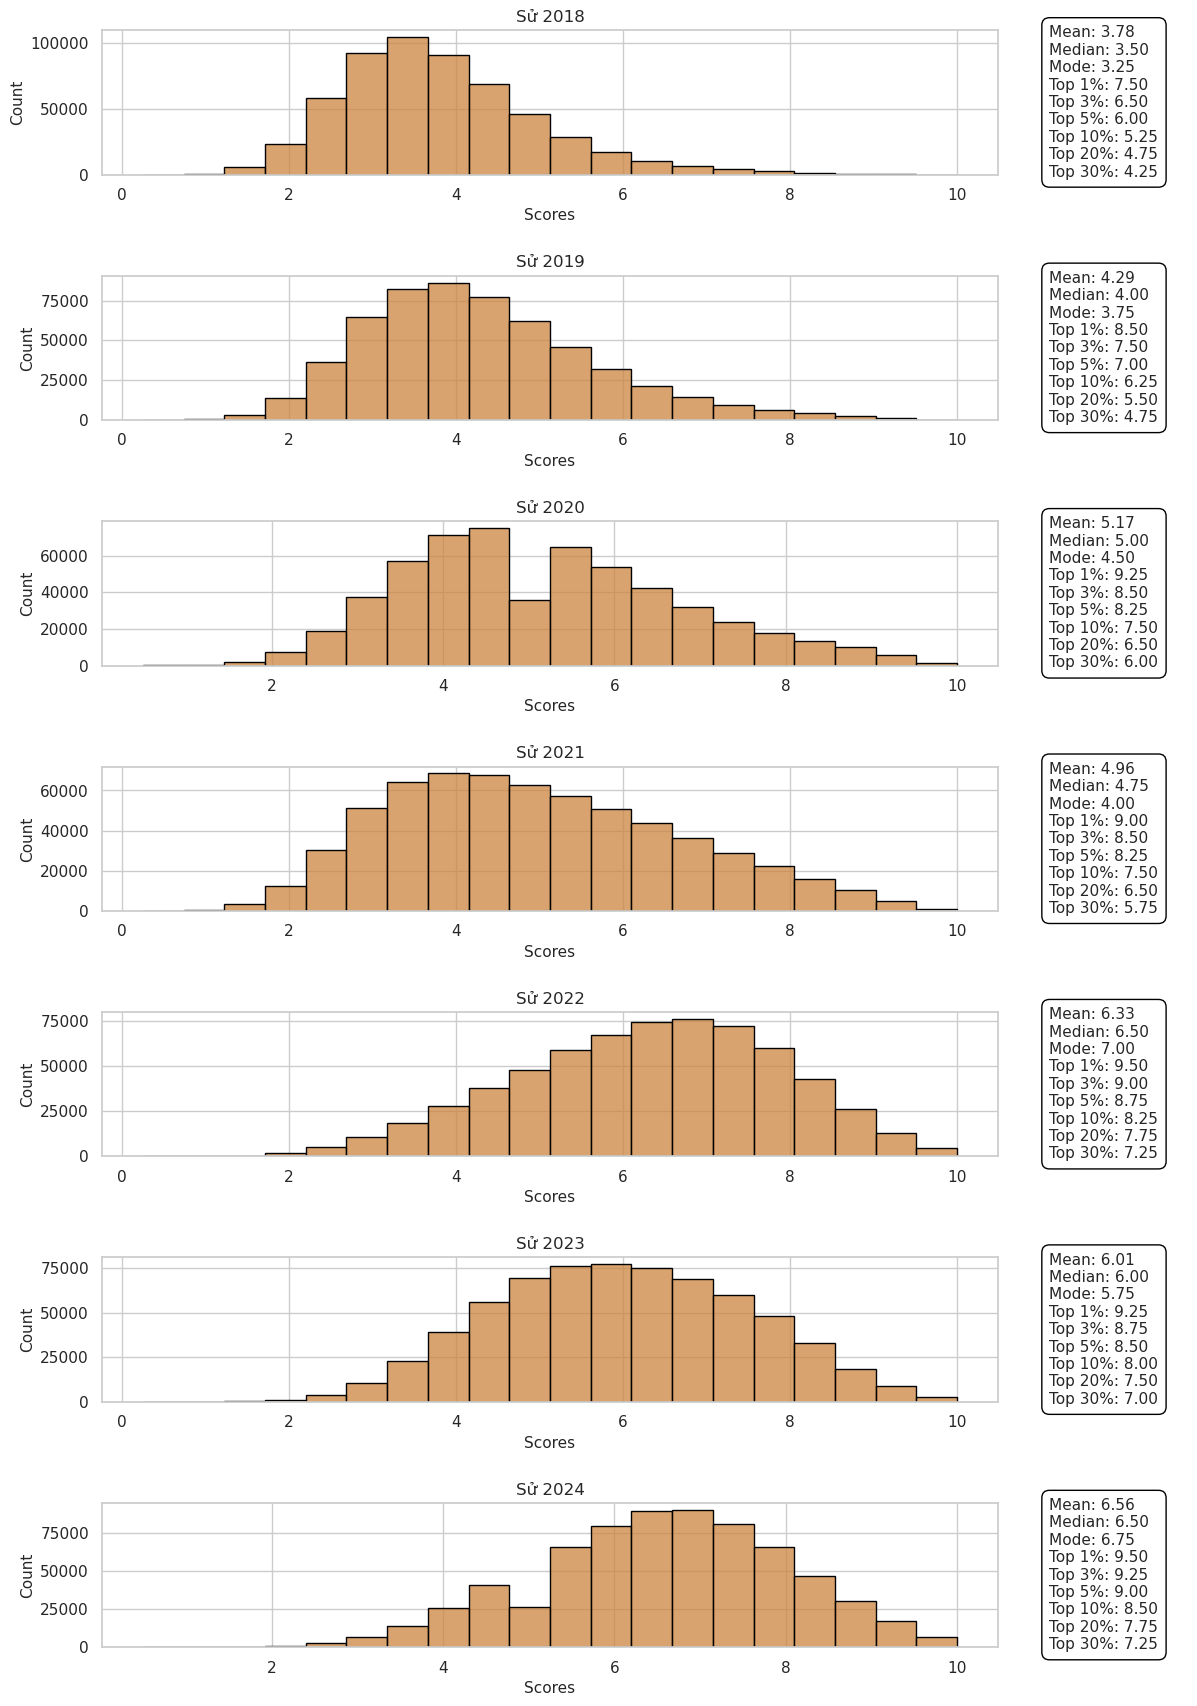

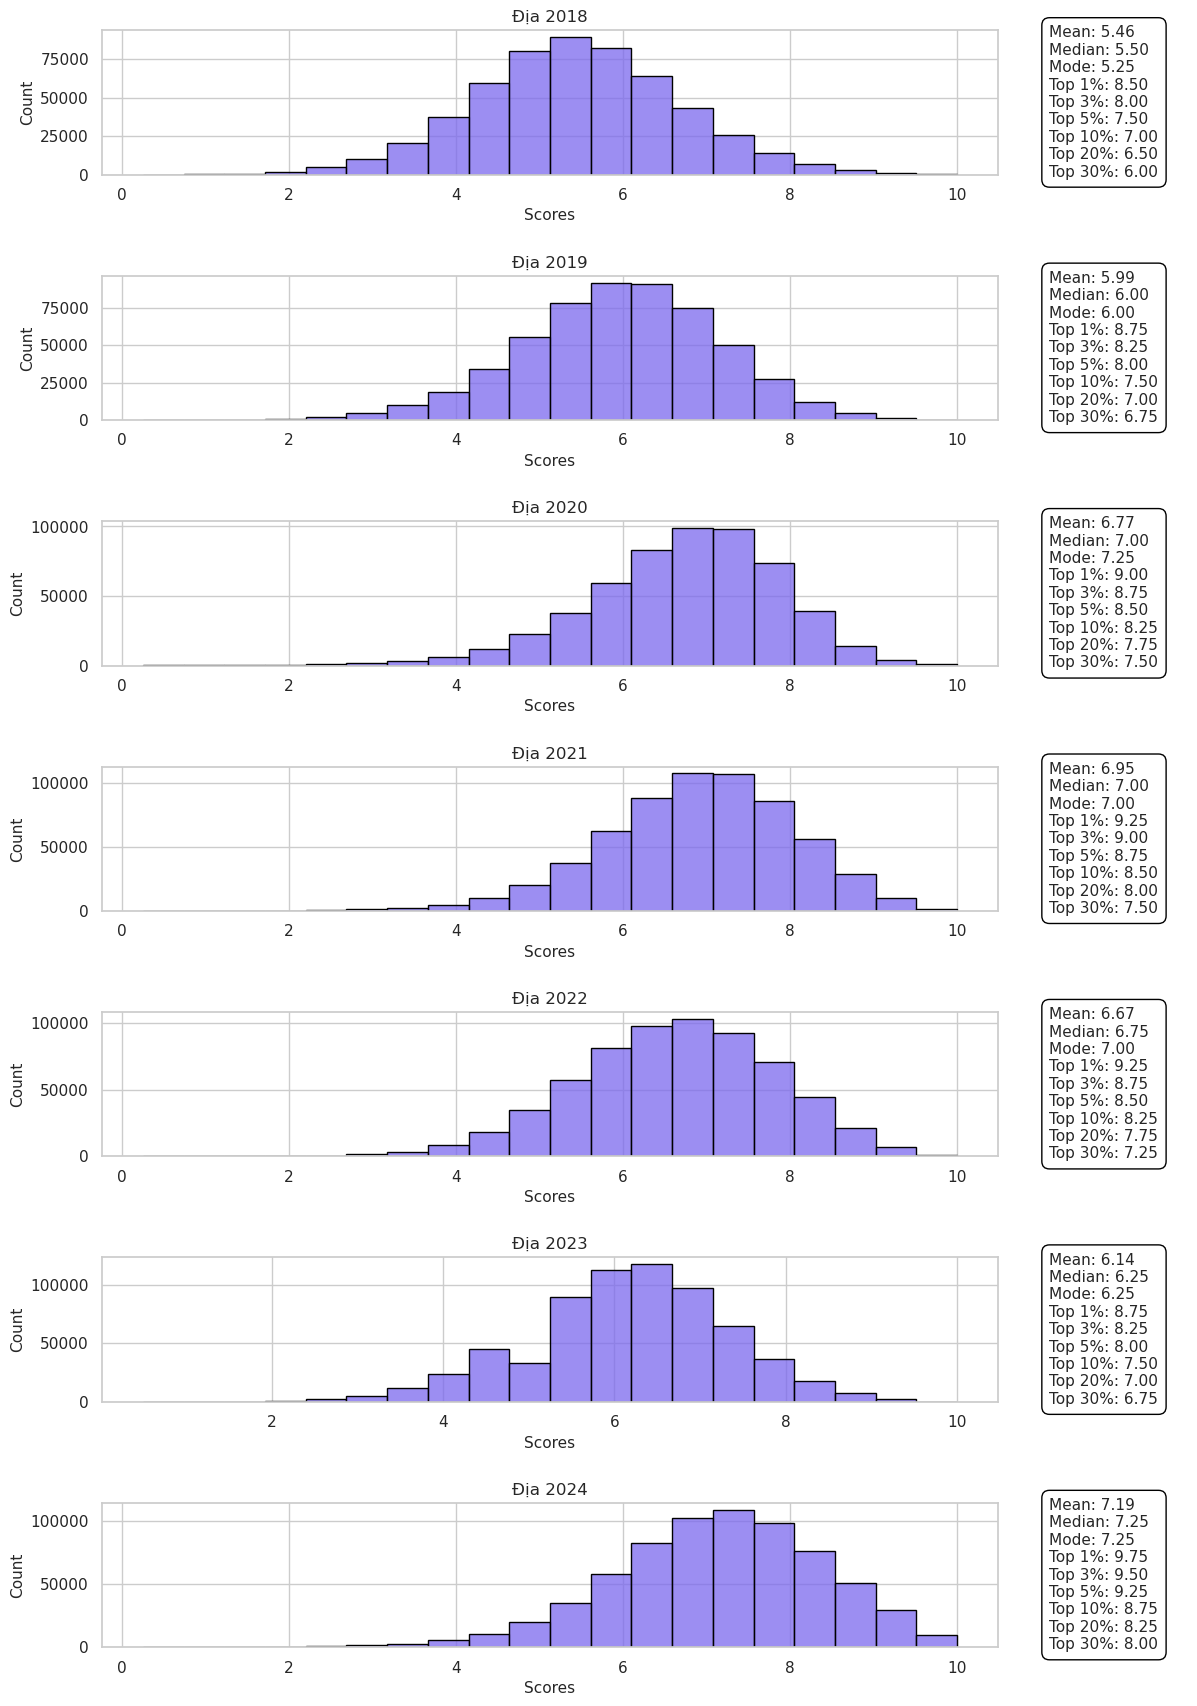

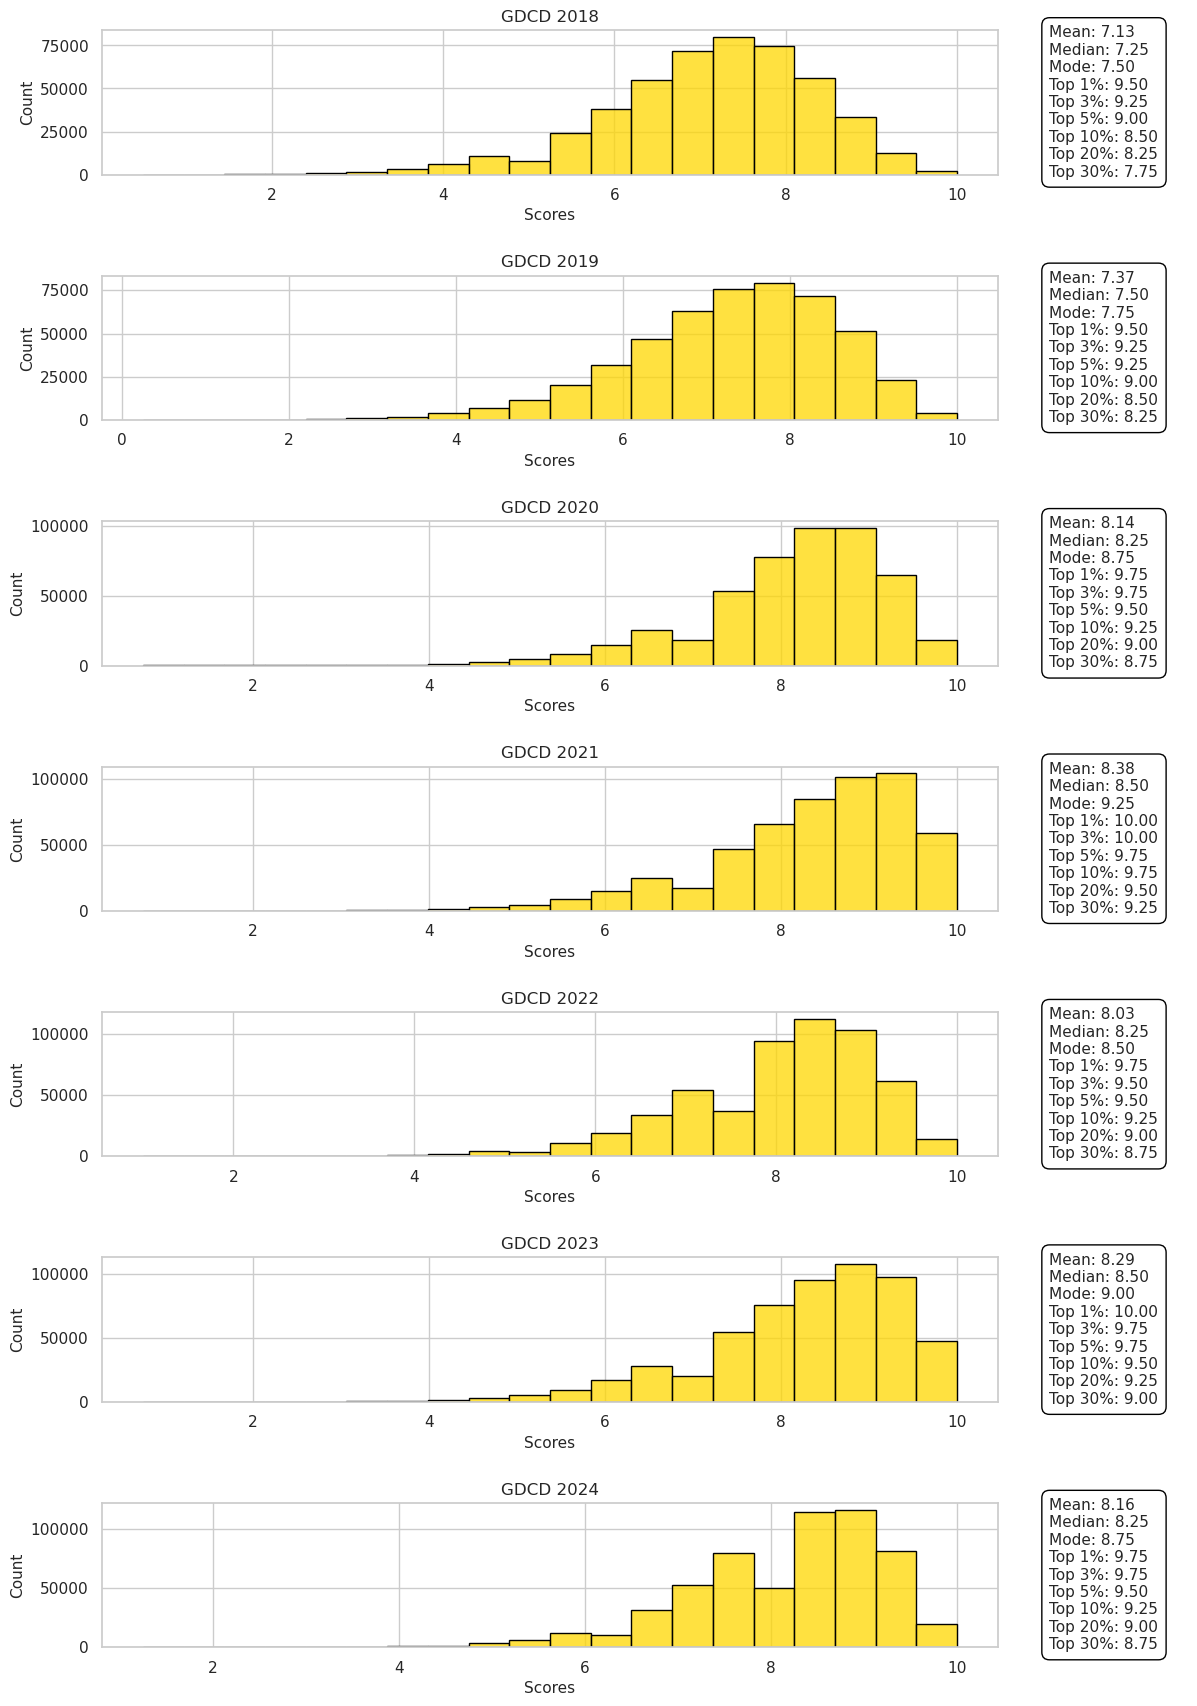

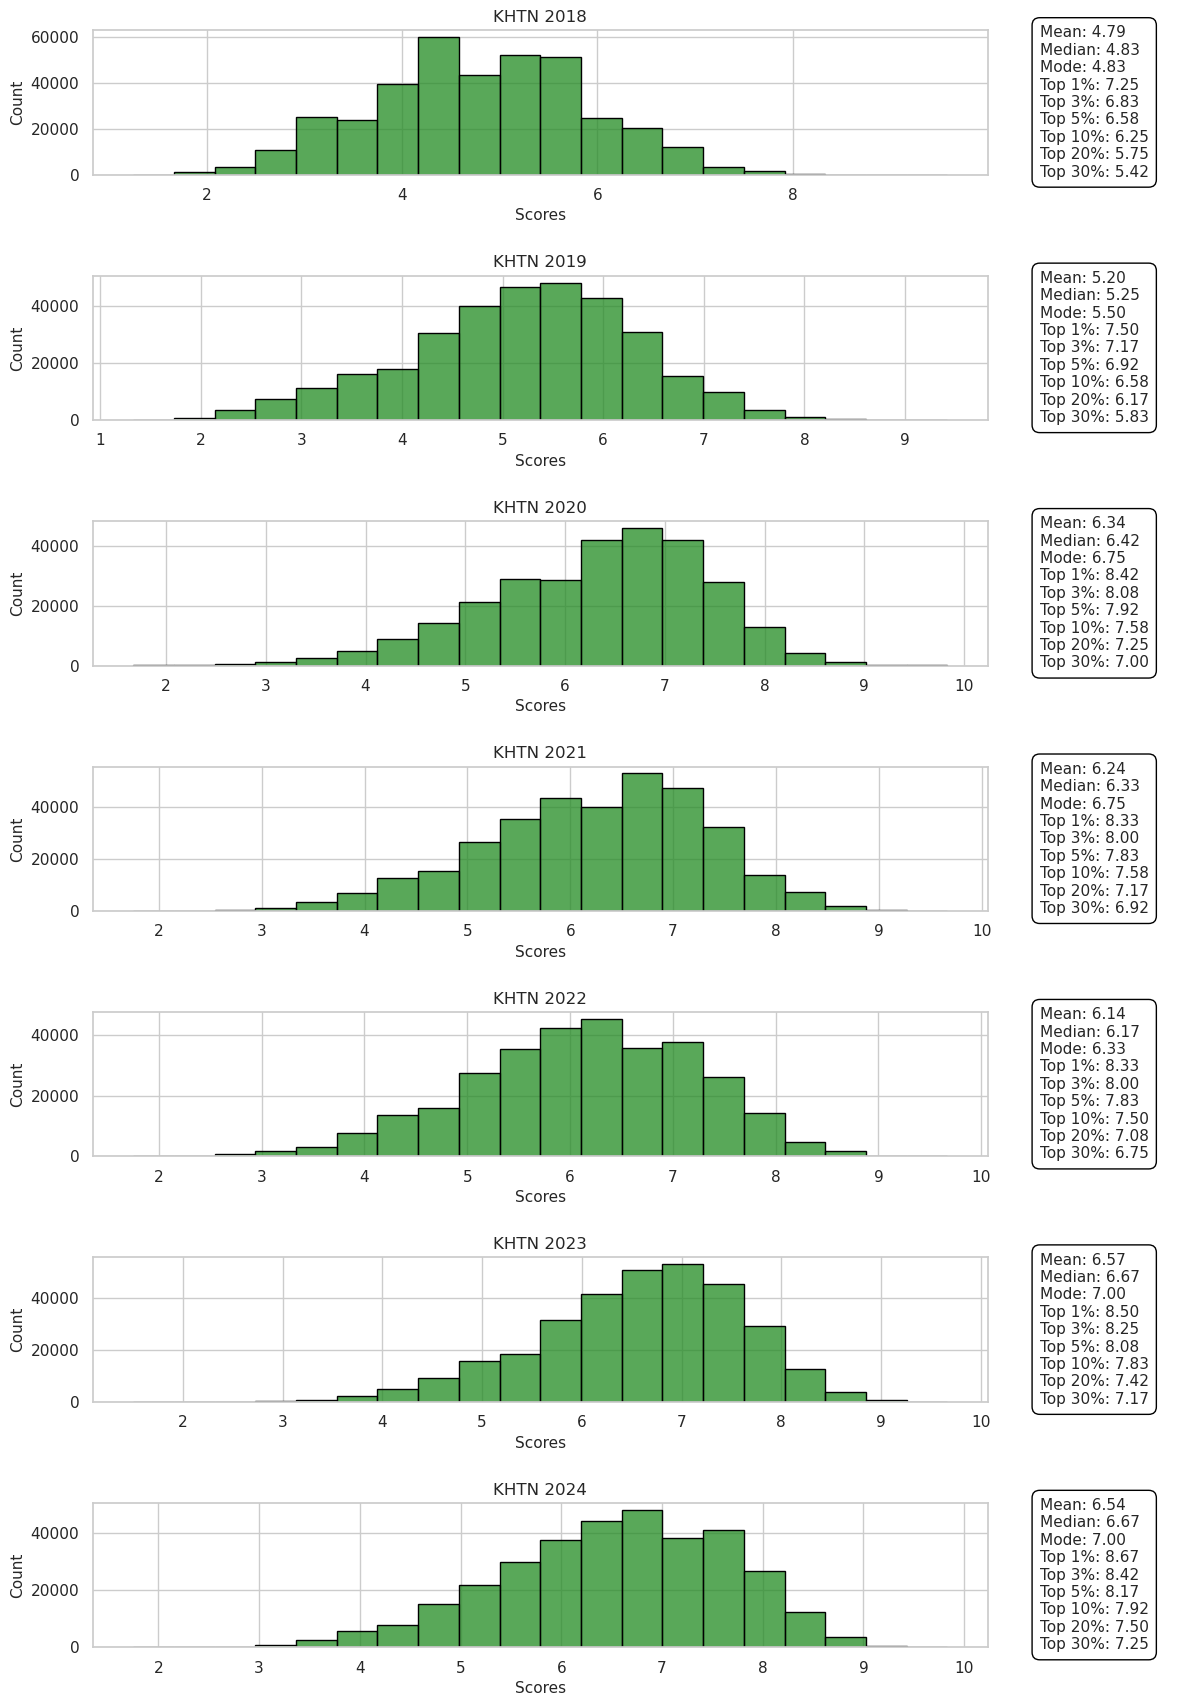

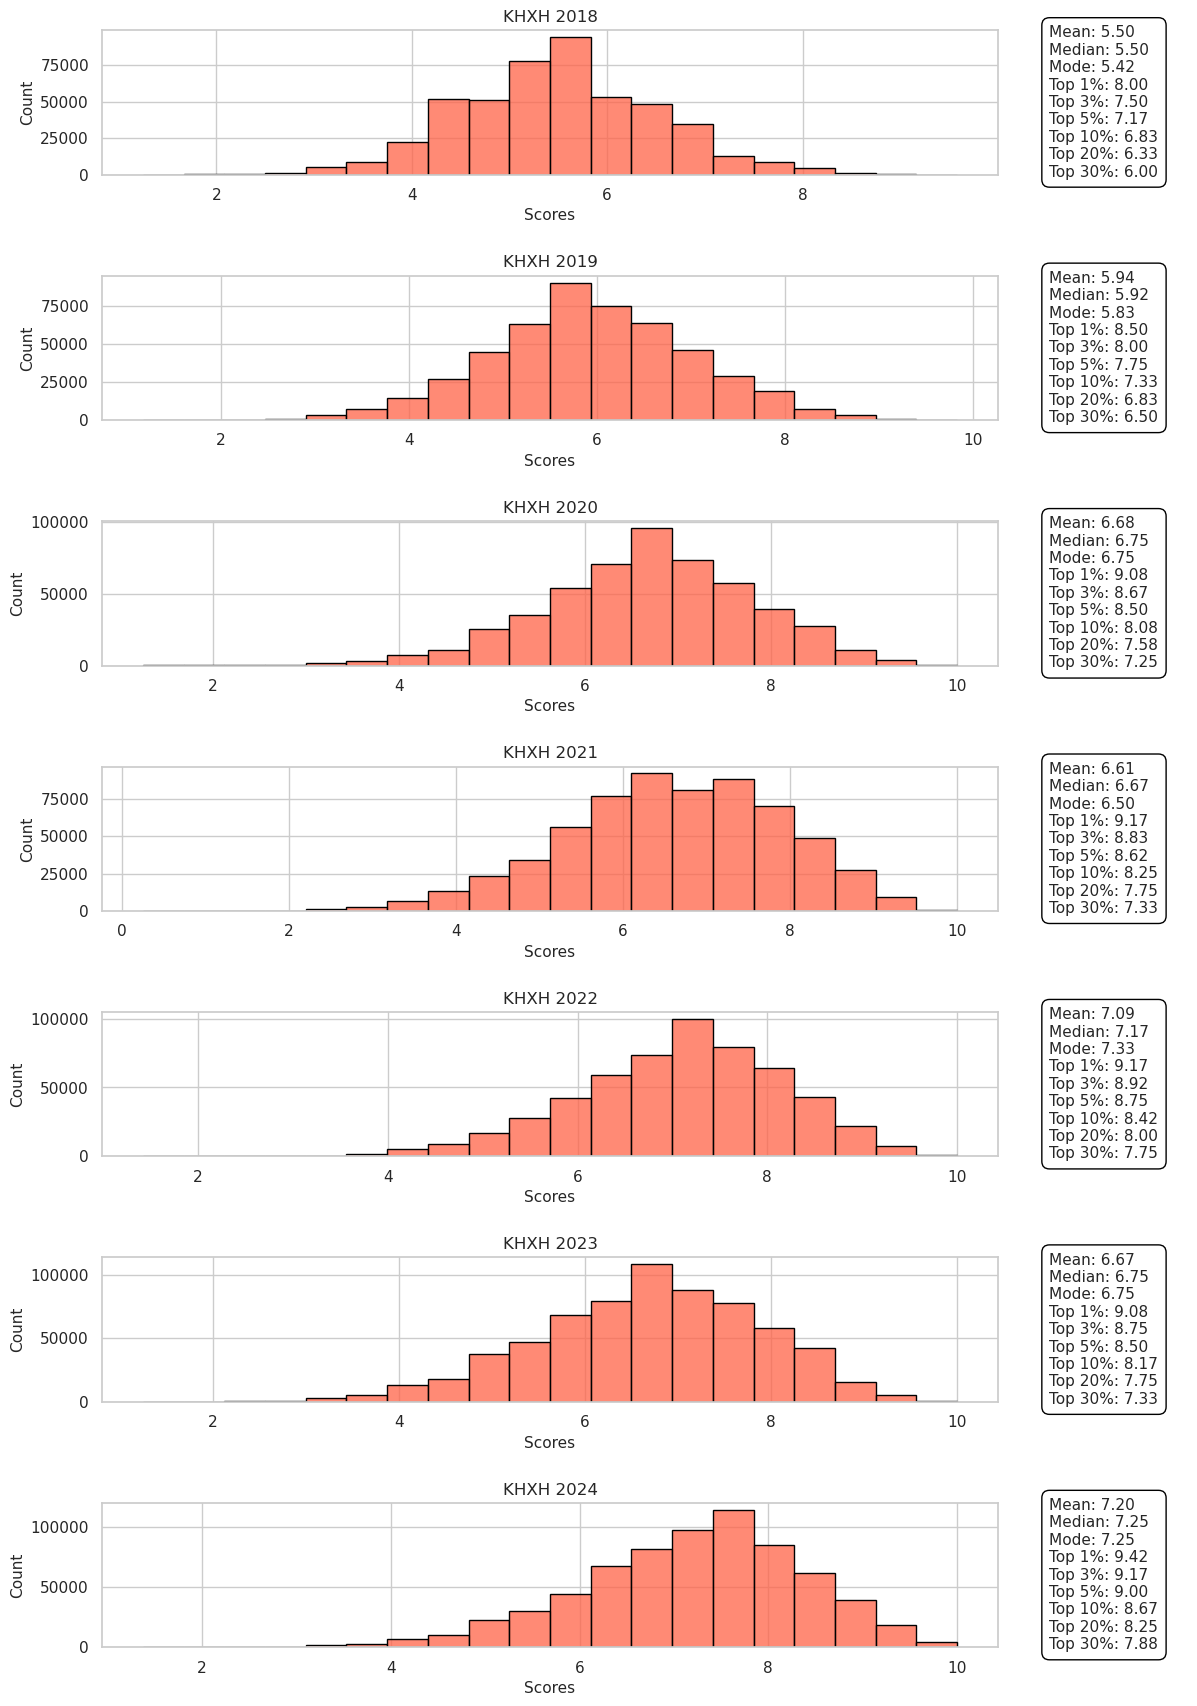

In [13]:
for subject in subjects:
    plot_subject_histograms(subject)

In [14]:
def plot_kde_single_subject(subject):
    sns.set_theme(style="whitegrid")
    
    years = df.select('Year').unique().sort('Year').to_series()
    
    plt.figure(figsize=(10, 6))
    
    for year in years:
        subset = df.filter(pl.col('Year') == year)
        if subject == 'NguVan':
            sns.kdeplot(subset.select(subject).drop_nulls().to_series(), bw_adjust=3, label=str(year))
        else:
            sns.kdeplot(subset.select(subject).drop_nulls().to_series(), bw_adjust=2, label=str(year))

    plt.title(f'KDE Plot for {subject_names[subject]}')
    plt.xlabel(f'Scores in {subject_names[subject]}')
    plt.ylabel('Density')
    plt.legend(title='Year')
    plt.show()


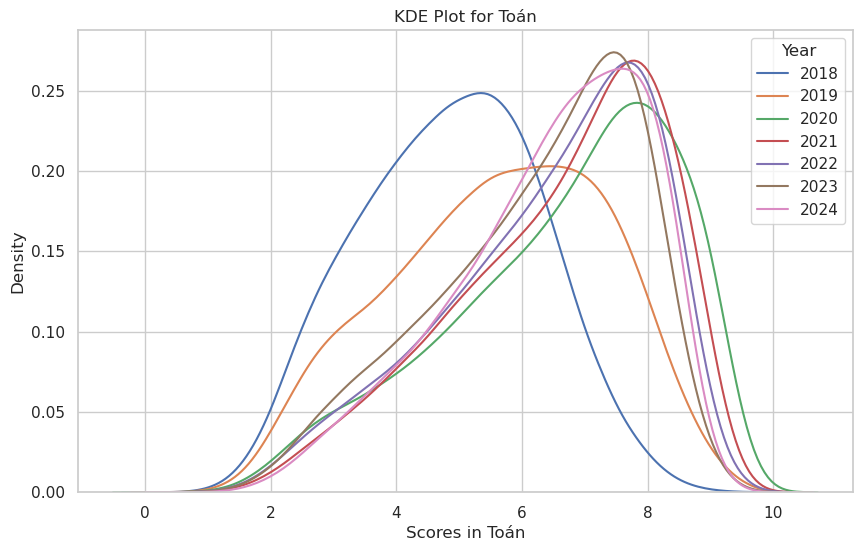

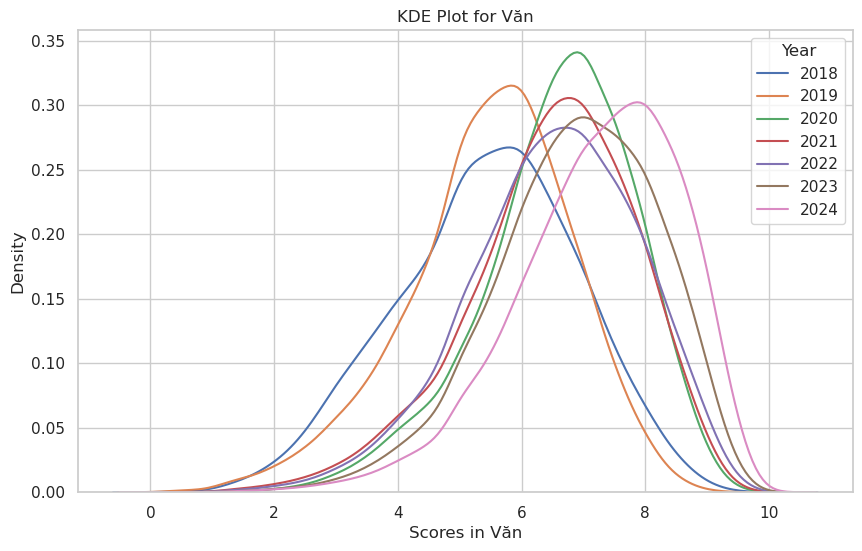

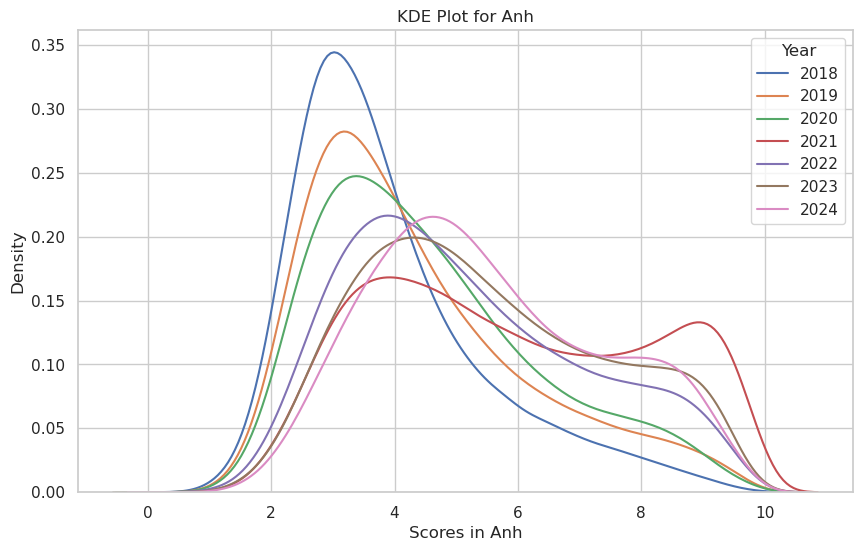

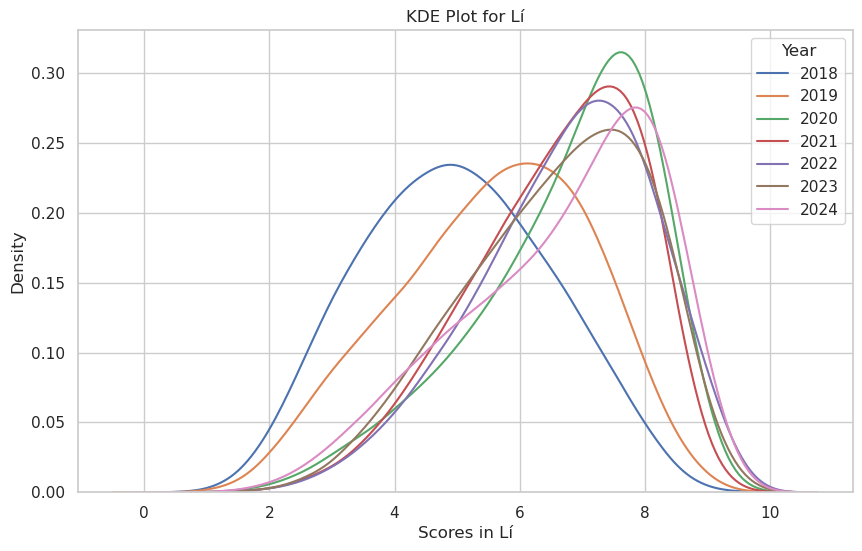

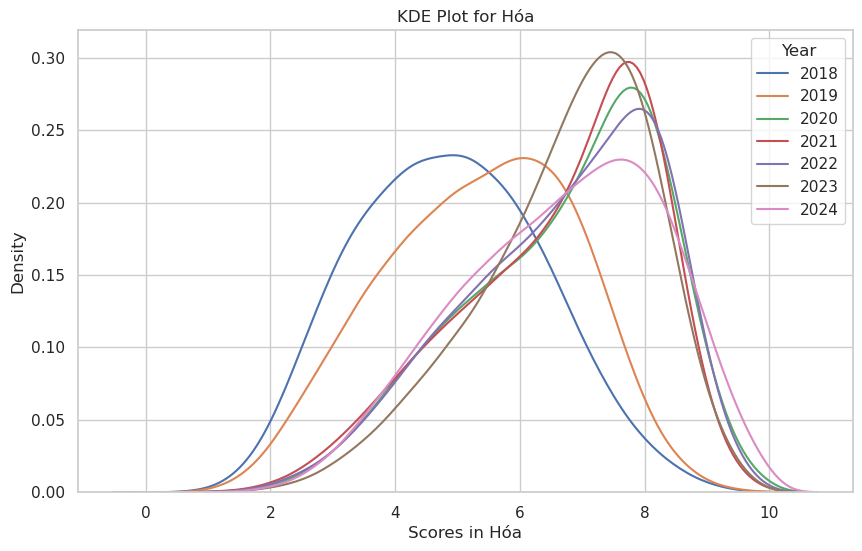

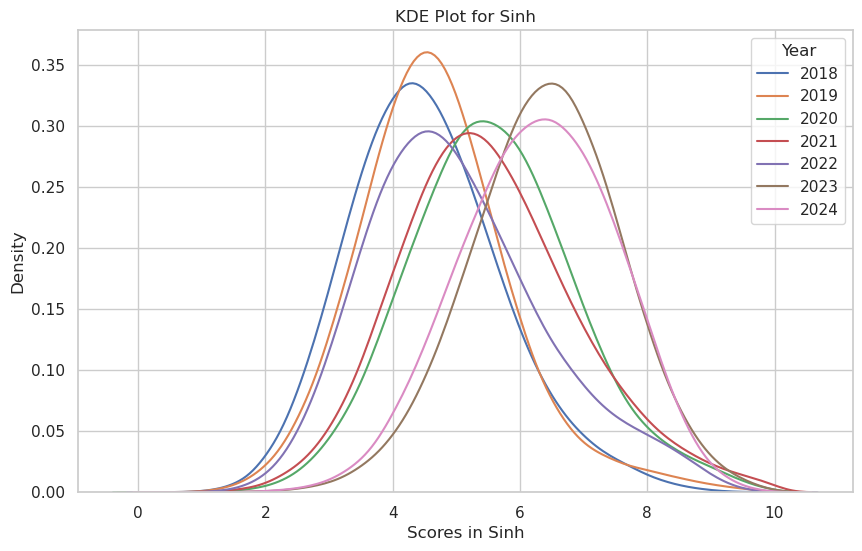

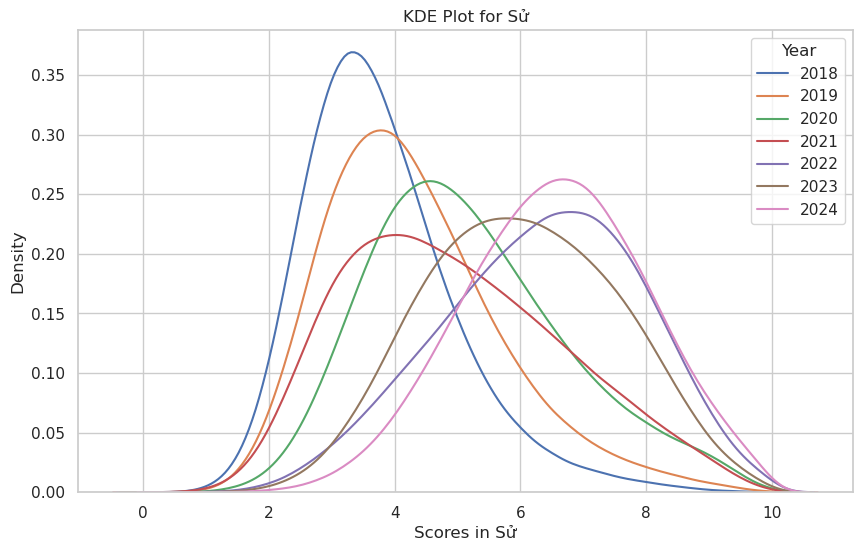

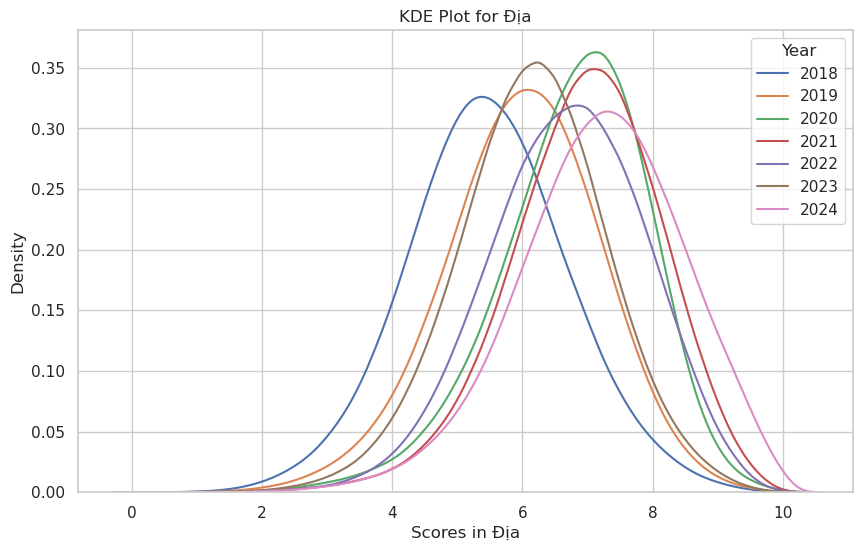

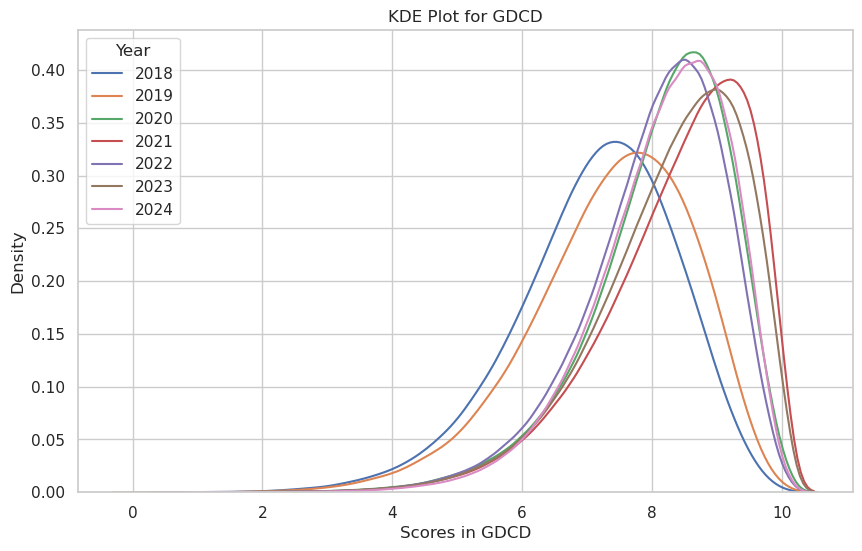

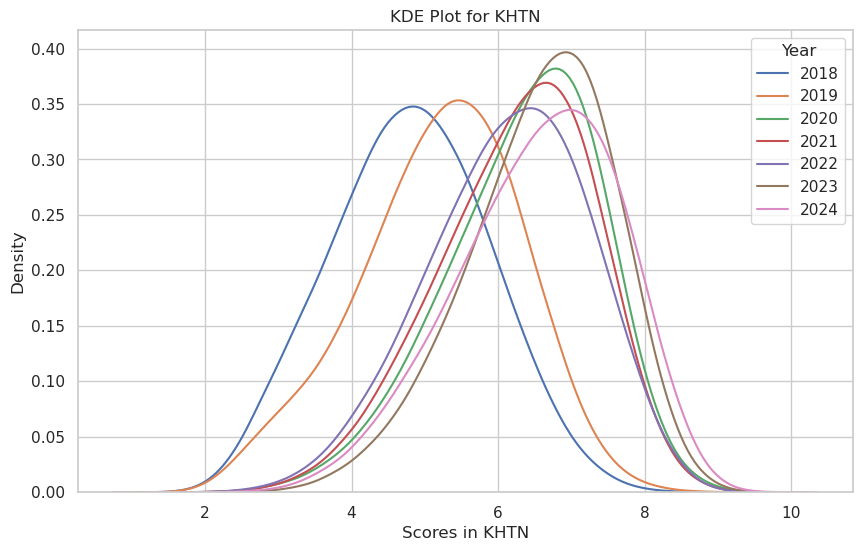

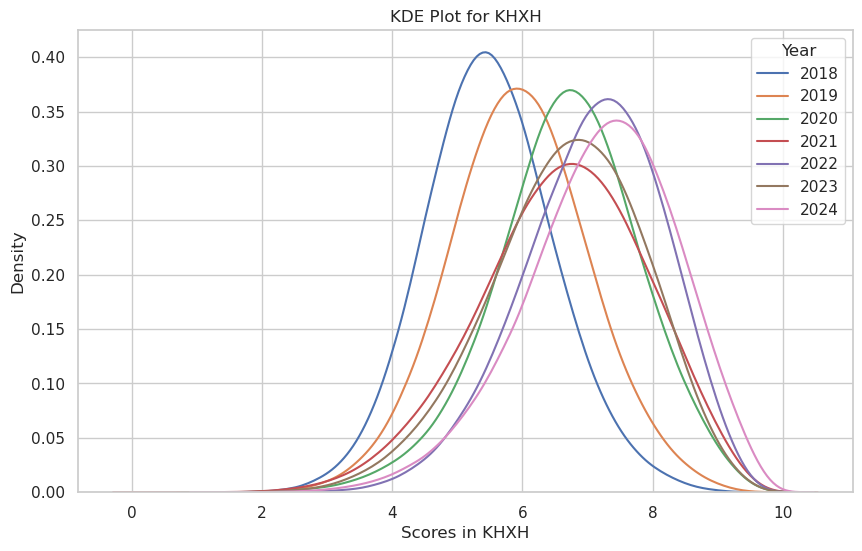

In [15]:
for subject in subjects:
    plot_kde_single_subject(subject)

In [16]:
df = df.with_columns(
    (pl.col('Toan') + pl.col('VatLi') + pl.col('HoaHoc')).alias('A'),
    (pl.col('Toan') + pl.col('VatLi') + pl.col('NgoaiNgu')).alias('A1'),
    (pl.col('Toan') + pl.col('HoaHoc') + pl.col('SinhHoc')).alias('B'),
    (pl.col('NguVan') + pl.col('LichSu') + pl.col('DiaLi')).alias('C'),
    (pl.col('NguVan') + pl.col('Toan') + pl.col('NgoaiNgu')).alias('D')
)

df

shape: (6_569_321, 19)
┌──────┬──────────┬───────────┬──────┬───┬───────┬──────┬───────┬───────┐
│ Year ┆ CityCode ┆ StudentID ┆ Toan ┆ … ┆ A1    ┆ B    ┆ C     ┆ D     │
│ ---  ┆ ---      ┆ ---       ┆ ---  ┆   ┆ ---   ┆ ---  ┆ ---   ┆ ---   │
│ i64  ┆ i64      ┆ i64       ┆ f64  ┆   ┆ f64   ┆ f64  ┆ f64   ┆ f64   │
╞══════╪══════════╪═══════════╪══════╪═══╪═══════╪══════╪═══════╪═══════╡
│ 2018 ┆ 1        ┆ 1000033   ┆ 7.6  ┆ … ┆ null  ┆ null ┆ 19.75 ┆ 22.85 │
│ 2018 ┆ 1        ┆ 1000034   ┆ 6.2  ┆ … ┆ null  ┆ null ┆ 18.5  ┆ 21.65 │
│ 2018 ┆ 1        ┆ 1000035   ┆ 6.4  ┆ … ┆ null  ┆ null ┆ 16.0  ┆ 20.25 │
│ 2018 ┆ 1        ┆ 1000037   ┆ 2.8  ┆ … ┆ null  ┆ null ┆ 14.0  ┆ 14.0  │
│ 2018 ┆ 1        ┆ 1000038   ┆ 4.0  ┆ … ┆ null  ┆ null ┆ 16.0  ┆ 15.3  │
│ …    ┆ …        ┆ …         ┆ …    ┆ … ┆ …     ┆ …    ┆ …     ┆ …     │
│ 2024 ┆ 64       ┆ 64006669  ┆ 3.2  ┆ … ┆ null  ┆ null ┆ 15.5  ┆ null  │
│ 2024 ┆ 64       ┆ 64006675  ┆ 8.2  ┆ … ┆ 24.45 ┆ 22.7 ┆ null  ┆ 23.45 │
│ 2024 ┆ 64       ┆ 64006673  ┆ 4.8  ┆ … ┆ null  ┆ null ┆ 20.75 ┆ null  │
│ 2024 ┆ 64       ┆ 64006674  ┆ 5.8  ┆ … ┆ 16.55 ┆ 15.8 ┆ null  ┆ 18.05 │
│ 2024 ┆ 64       ┆ 64006679  ┆ 6.0  ┆ … ┆ null  ┆ null ┆ 18.08 ┆ 17.08 │
└──────┴──────────┴───────────┴──────┴───┴───────┴──────┴───────┴───────┘

In [17]:
subject_names = {
    'A': 'A',
    'A1': 'A1',
    'B': 'B',
    'C': 'C',
    'D': 'D'
}

subject_colors = {
    'A': 'darkgreen',
    'A1': 'coral',
    'B': 'royalblue',
    'C': 'rebeccapurple',
    'D': 'hotpink'
}

mean_score_df = df.select('Year', 'A', 'A1', 'B', 'C', 'D') \
    .group_by('Year') \
    .agg(*[pl.mean(col) for col in ['A', 'A1', 'B', 'C', 'D']])
mean_score_df = mean_score_df.sort('Year')

In [18]:
mean_score_df.hvplot.line(
    x='Year',
    y=['A', 'A1', 'B', 'C', 'D'],
    ylabel='Mean score',
    xlabel='Year',
    title='Mean score of each subject in each year',
    width=750,
    height=500,
    color=[subject_colors[subject] for subject in ['A', 'A1', 'B', 'C', 'D']]
)

:NdOverlay   [Variable]
   :Curve   [Year]   (value)

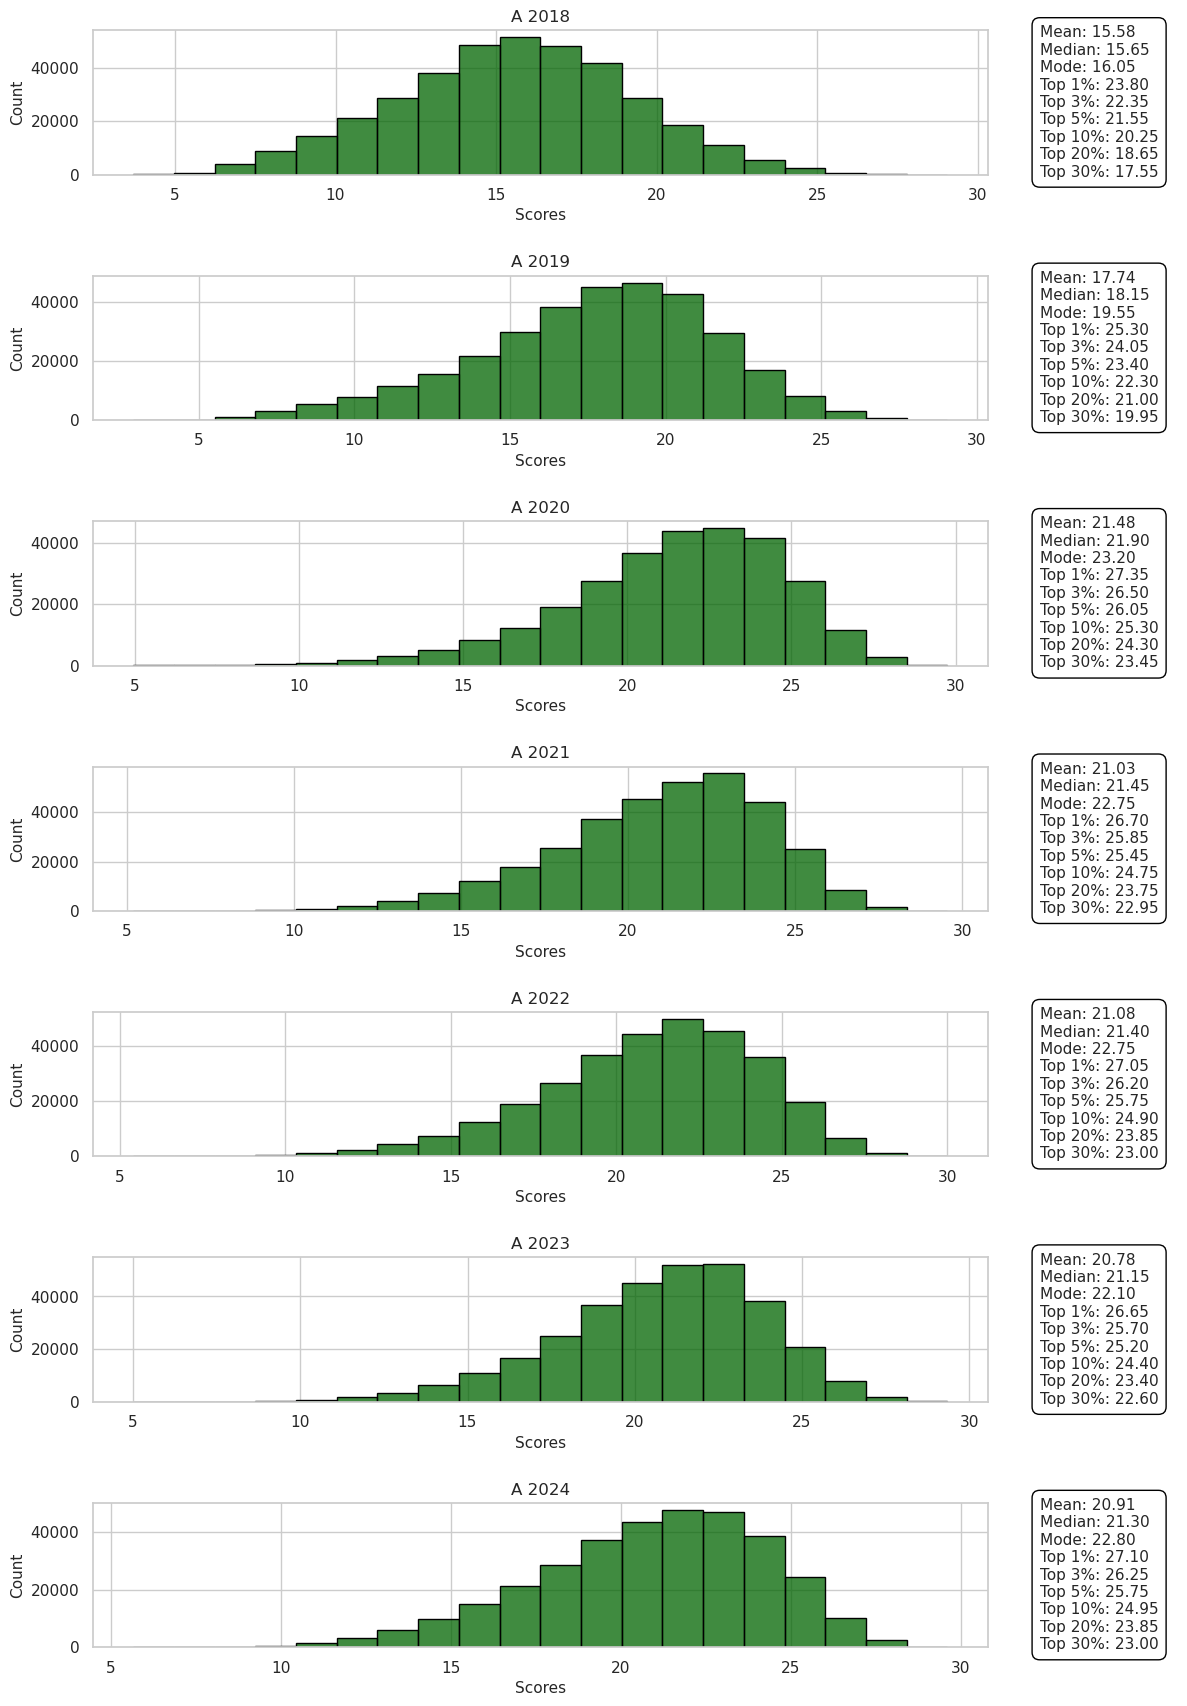

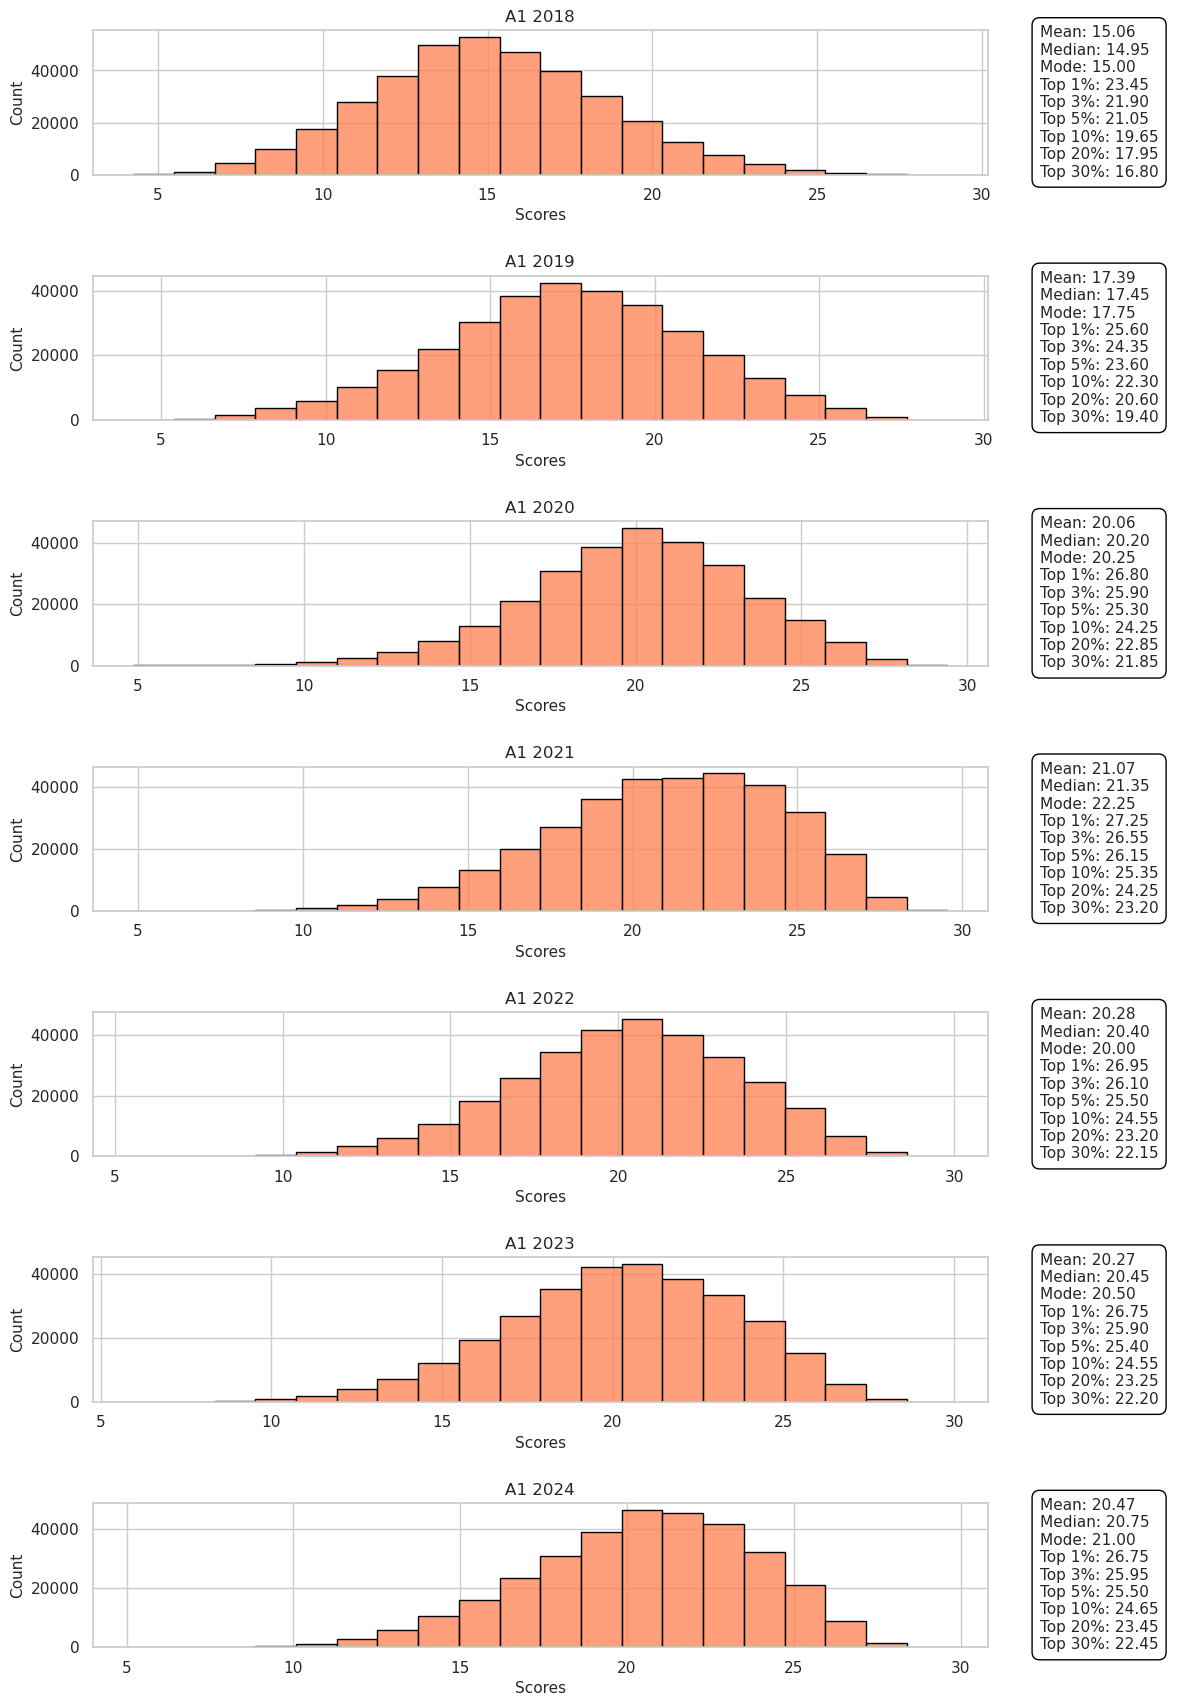

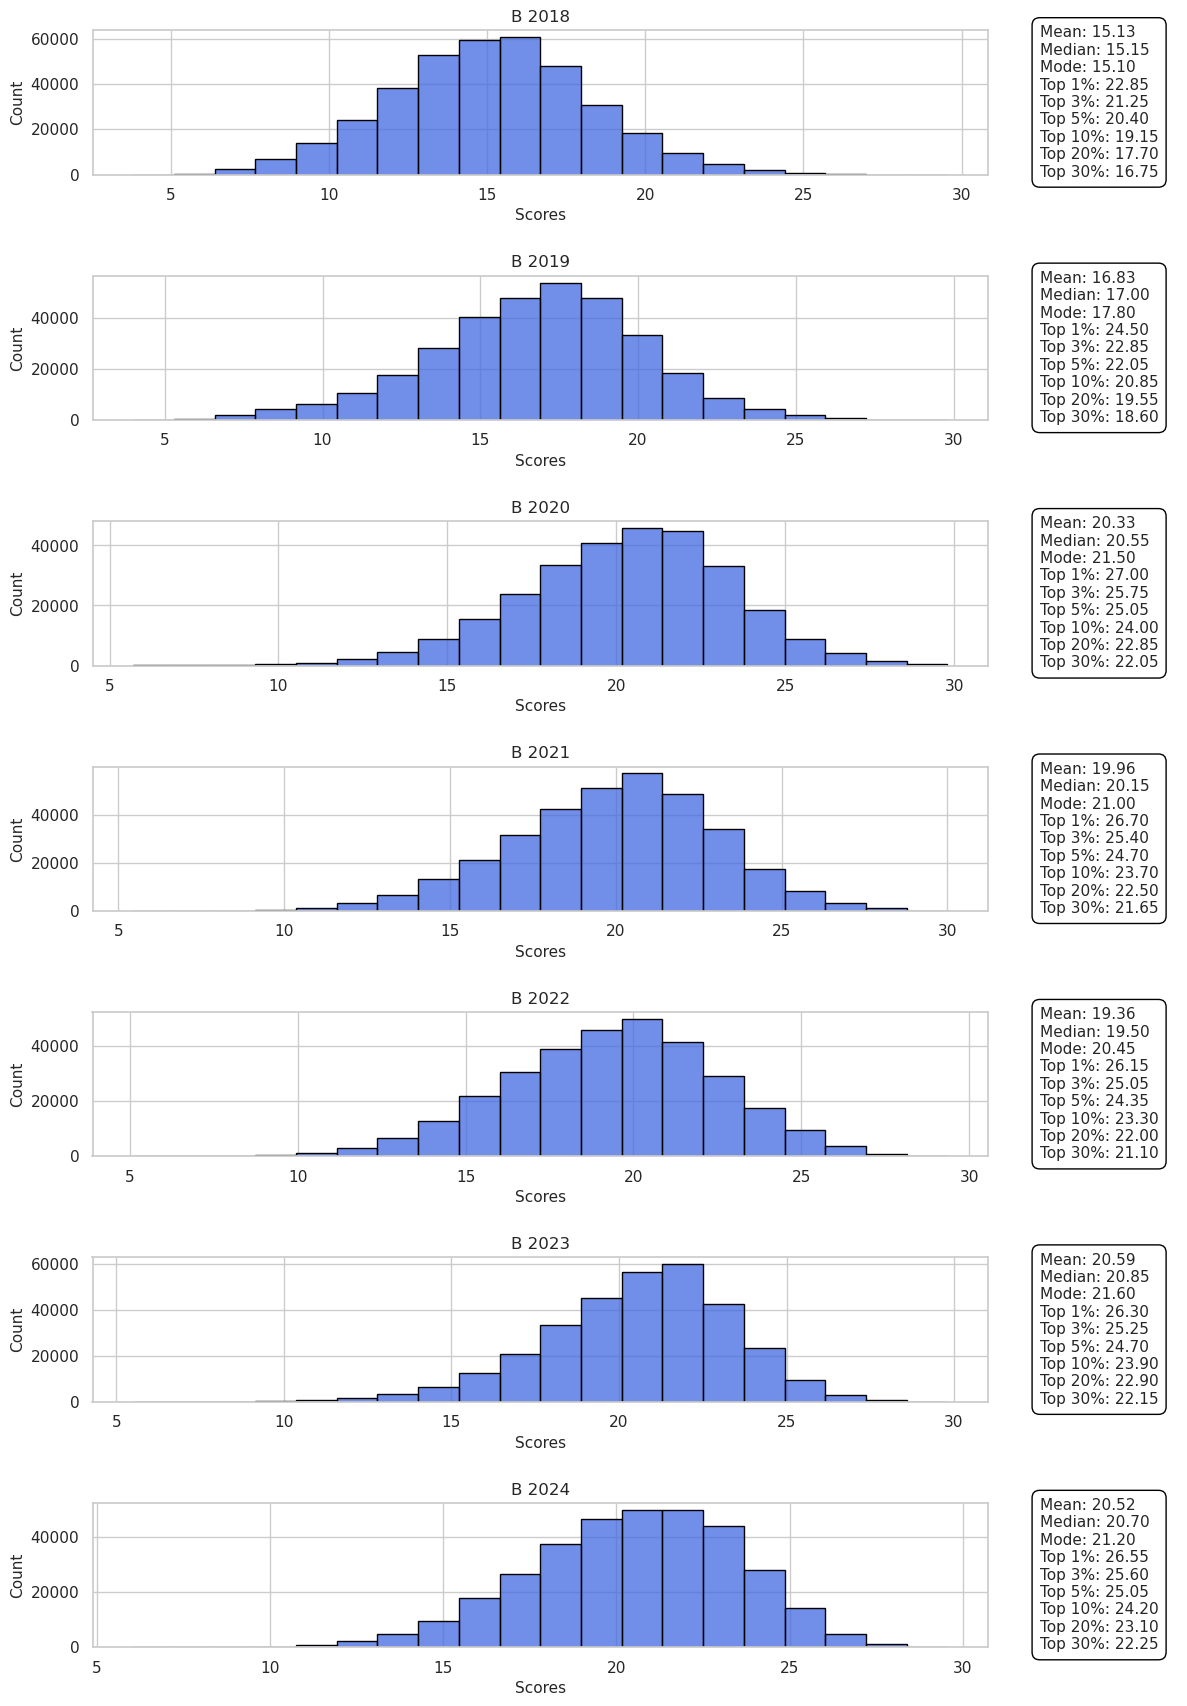

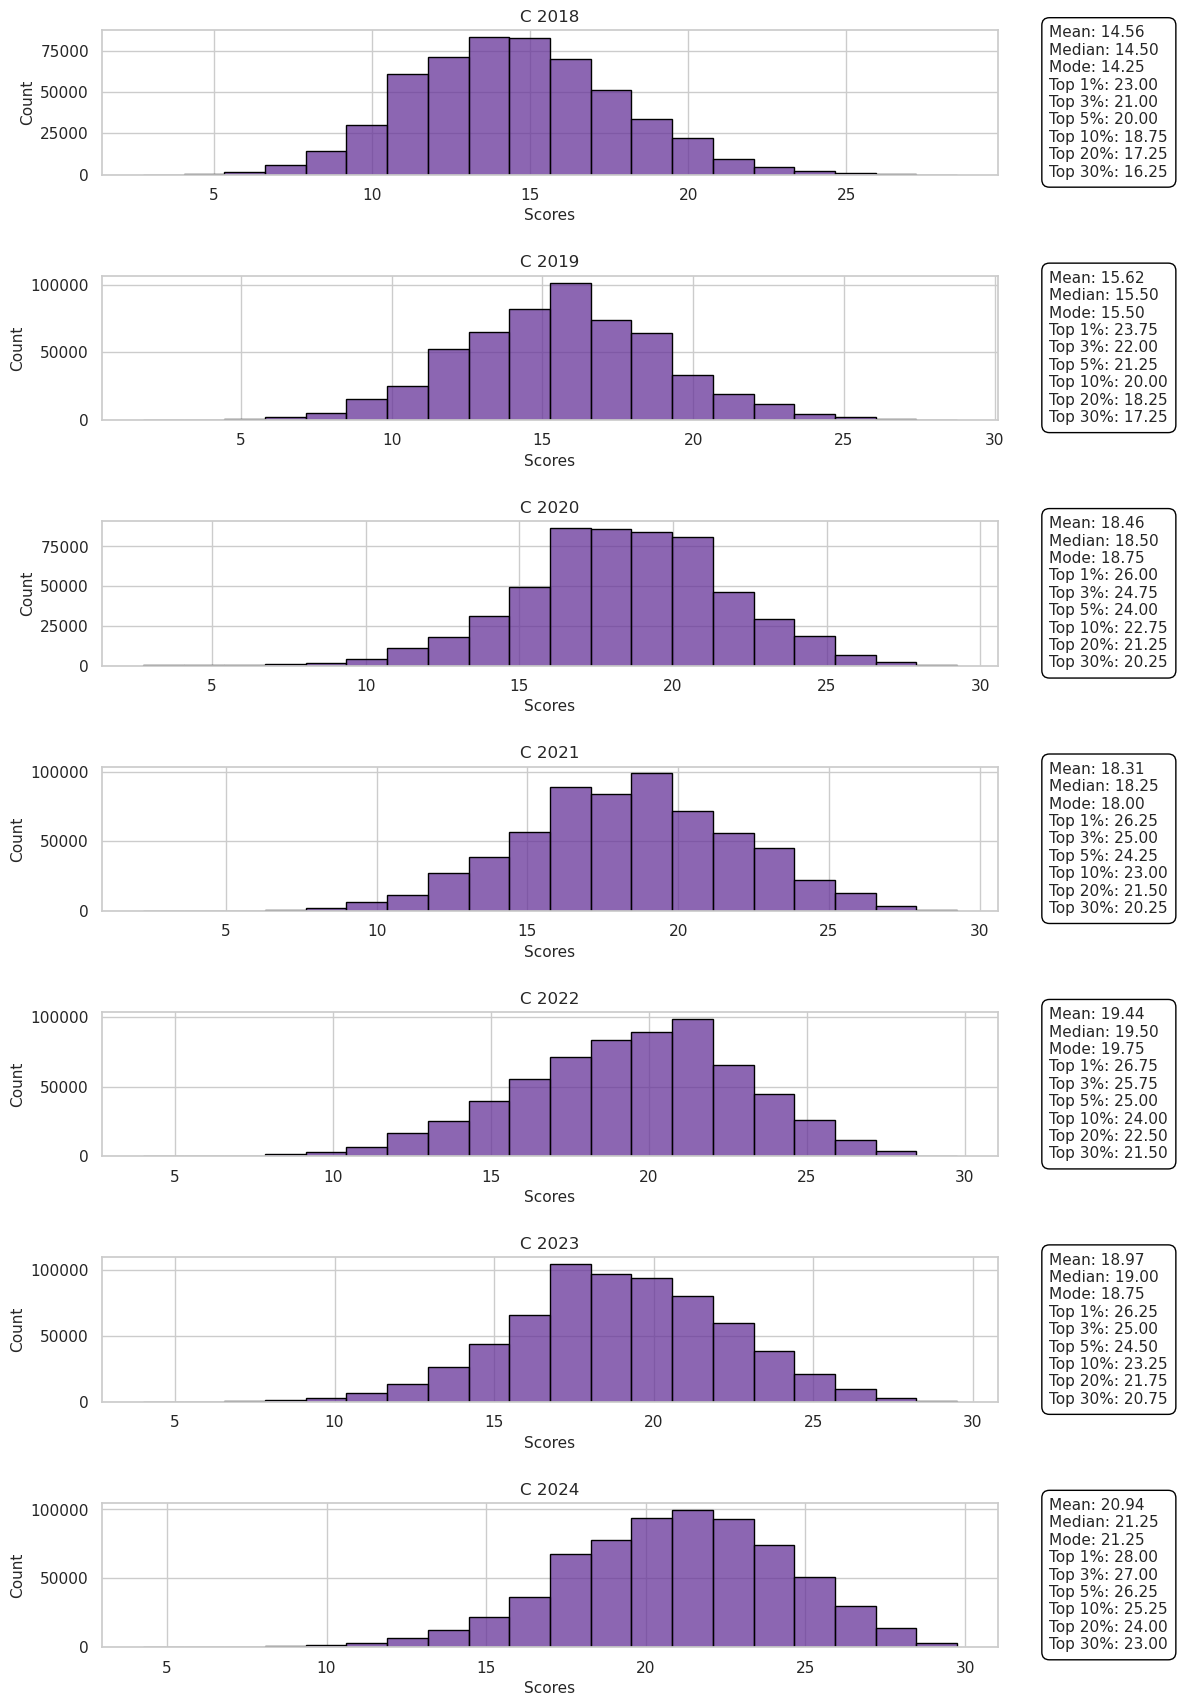

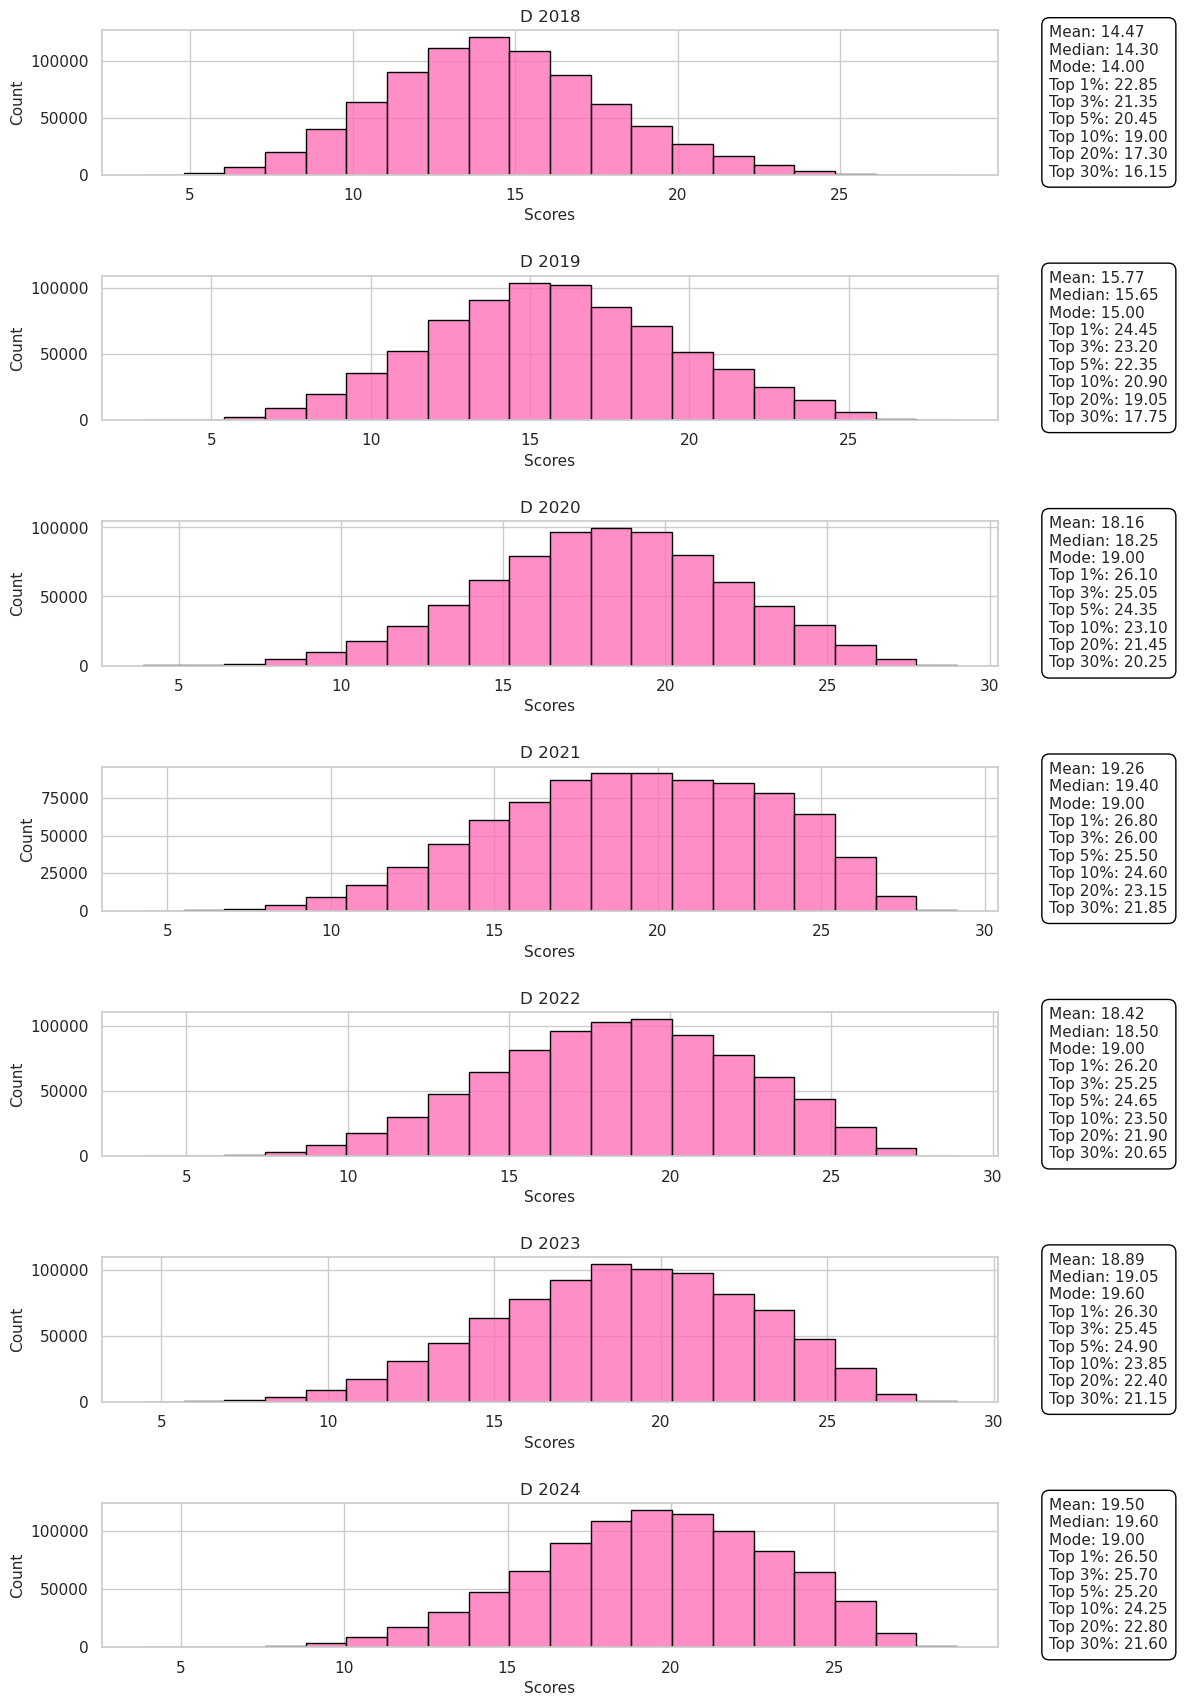

In [19]:
for combination in subject_names.keys():
    plot_subject_histograms(combination)

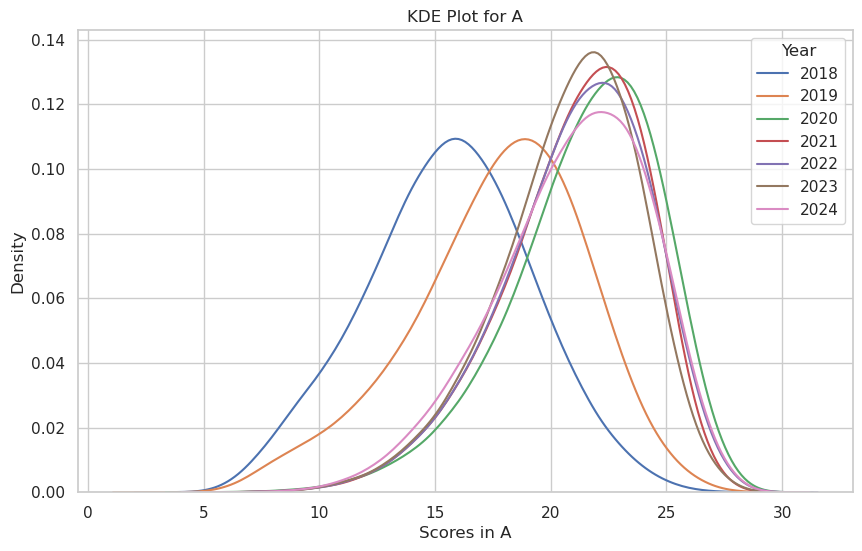

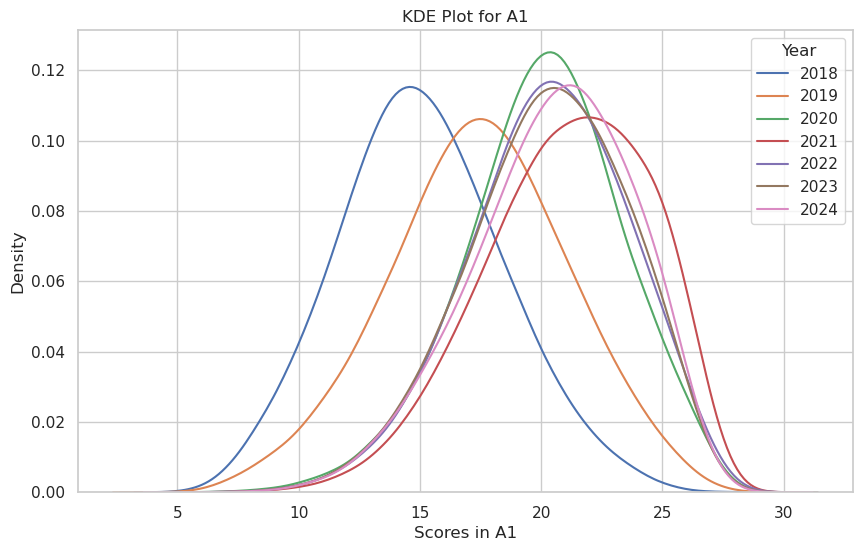

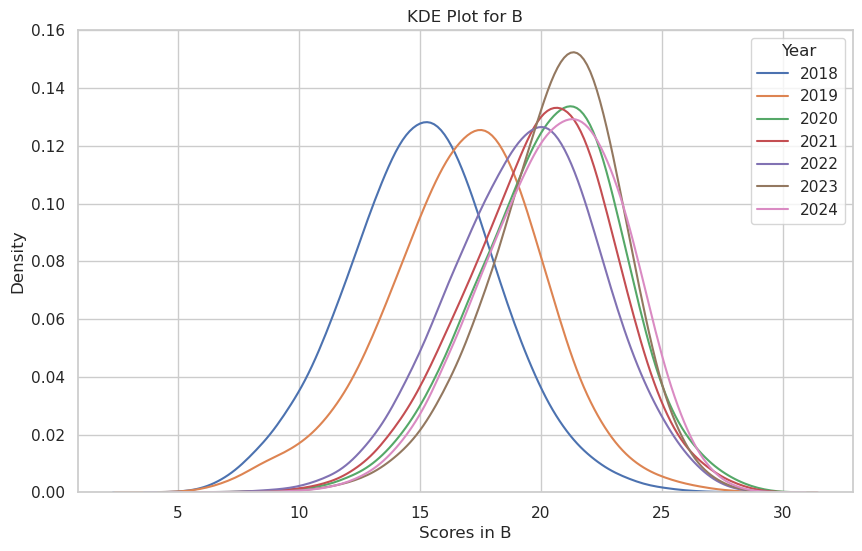

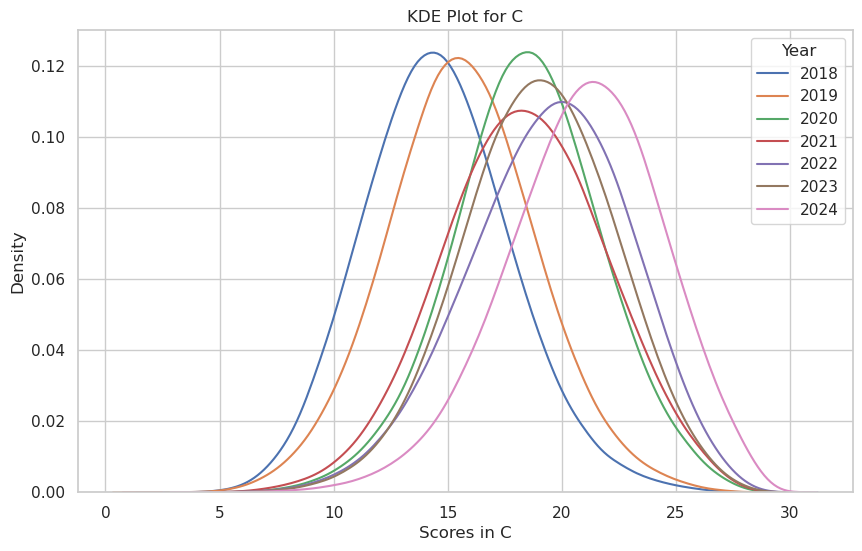

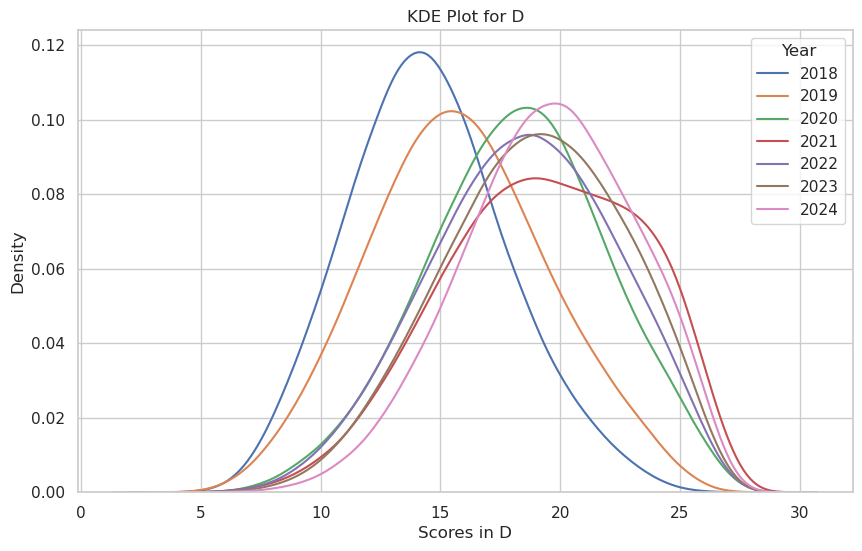

In [20]:
for combination in subject_names.keys():
    plot_kde_single_subject(combination)